In [115]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [471]:
mouse = '4222153.2'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

df_mouse = df[df['MouseName'].str.match(mouse)]
# df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


MouseName  DateFolder  SessionNumber              Track  RewardCount  \
1727  4222153.2  08_04_2019              1  TwoTower_foraging           86   
1751  4222153.2  10_04_2019              3  TwoTower_foraging           80   
1771  4222153.2  12_04_2019              2  TwoTower_foraging           86   
1788  4222153.2  14_04_2019              2  TwoTower_foraging           96   
1800  4222153.2  15_04_2019              2  TwoTower_foraging          103   
1816  4222153.2  16_04_2019              2  TwoTower_foraging           98   
1825  4222153.2  17_04_2019              2  TwoTower_foraging           77   
1833  4222153.2  18_04_2019              3  TwoTower_foraging           70   

      Imaging ImagingRegion   DateTime  \
1727        1           CA1 2019-04-08   
1751        1           CA1 2019-04-10   
1771        1           CA1 2019-04-12   
1788        1           CA1 2019-04-14   
1800        1           CA1 2019-04-15   
1816        1           CA1 2019-04-16   
1825        1           CA1 2019-04-17   
1833        1           CA1 2019-04-18   

                                              data file scanfile  \
1727  G:\My Drive\VR_Data\TwoTower\4222153.2\08_04_2...     None   
1751  G:\My Drive\VR_Data\TwoTower\4222153.2\10_04_2...     None   
1771  G:\My Drive\VR_Data\TwoTower\4222153.2\12_04_2...     None   
1788  G:\My Drive\VR_Data\TwoTower\4222153.2\14_04_2...     None   
1800  G:\My Drive\VR_Data\TwoTower\4222153.2\15_04_2...     None   
1816  G:\My Drive\VR_Data\TwoTower\4222153.2\16_04_2...     None   
1825  G:\My Drive\VR_Data\TwoTower\4222153.2\17_04_2...     None   
1833  G:\My Drive\VR_Data\TwoTower\4222153.2\18_04_2...     None   

                                                scanmat  \
1727  G:\My Drive\2P_Data\TwoTower\4222153.2\08_04_2...   
1751  G:\My Drive\2P_Data\TwoTower\4222153.2\10_04_2...   
1771  G:\My Drive\2P_Data\TwoTower\4222153.2\12_04_2...   
1788  G:\My Drive\2P_Data\TwoTower\4222153.2\14_04_2...   
1800  G:\My Drive\2P_Data\TwoTower\4222153.2\15_04_2...   
1816  G:\My Drive\2P_Data\TwoTower\4222153.2\16_04_2...   
1825  G:\My Drive\2P_Data\TwoTower\4222153.2\17_04_2...   
1833  G:\My Drive\2P_Data\TwoTower\4222153.2\18_04_2...   

                                              s2pfolder  
1727  G:\My Drive\2P_Data\TwoTower\4222153.2\08_04_2...  
1751  G:\My Drive\2P_Data\TwoTower\4222153.2\10_04_2...  
1771  G:\My Drive\2P_Data\TwoTower\4222153.2\12_04_2...  
1788  G:\My Drive\2P_Data\TwoTower\4222153.2\14_04_2...  
1800  G:\My Drive\2P_Data\TwoTower\4222153.2\15_04_2...  
1816  G:\My Drive\2P_Data\TwoTower\4222153.2\16_04_2...  
1825  G:\My Drive\2P_Data\TwoTower\4222153.2\17_04_2...  
1833  G:\My Drive\2P_Data\TwoTower\4222153.2\18_04_2...

In [472]:
sess = df_mouse.iloc[-1]
print(sess['data file'])

G:\My Drive\VR_Data\TwoTower\4222153.2\18_04_2019\TwoTower_foraging_3.sqlite


num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
start bootstrap
end bootstrap
start bootstrap
end bootstrap
start bootstrap
end bootstrap
start bootstrap
end bootstrap
start bootstrap
end bootstrap
morph 0 place cells = 1189 out of 1951 , 0.609431 
morph 1 place cells = 939 out of 1951, 0.481292
common place cells = 598


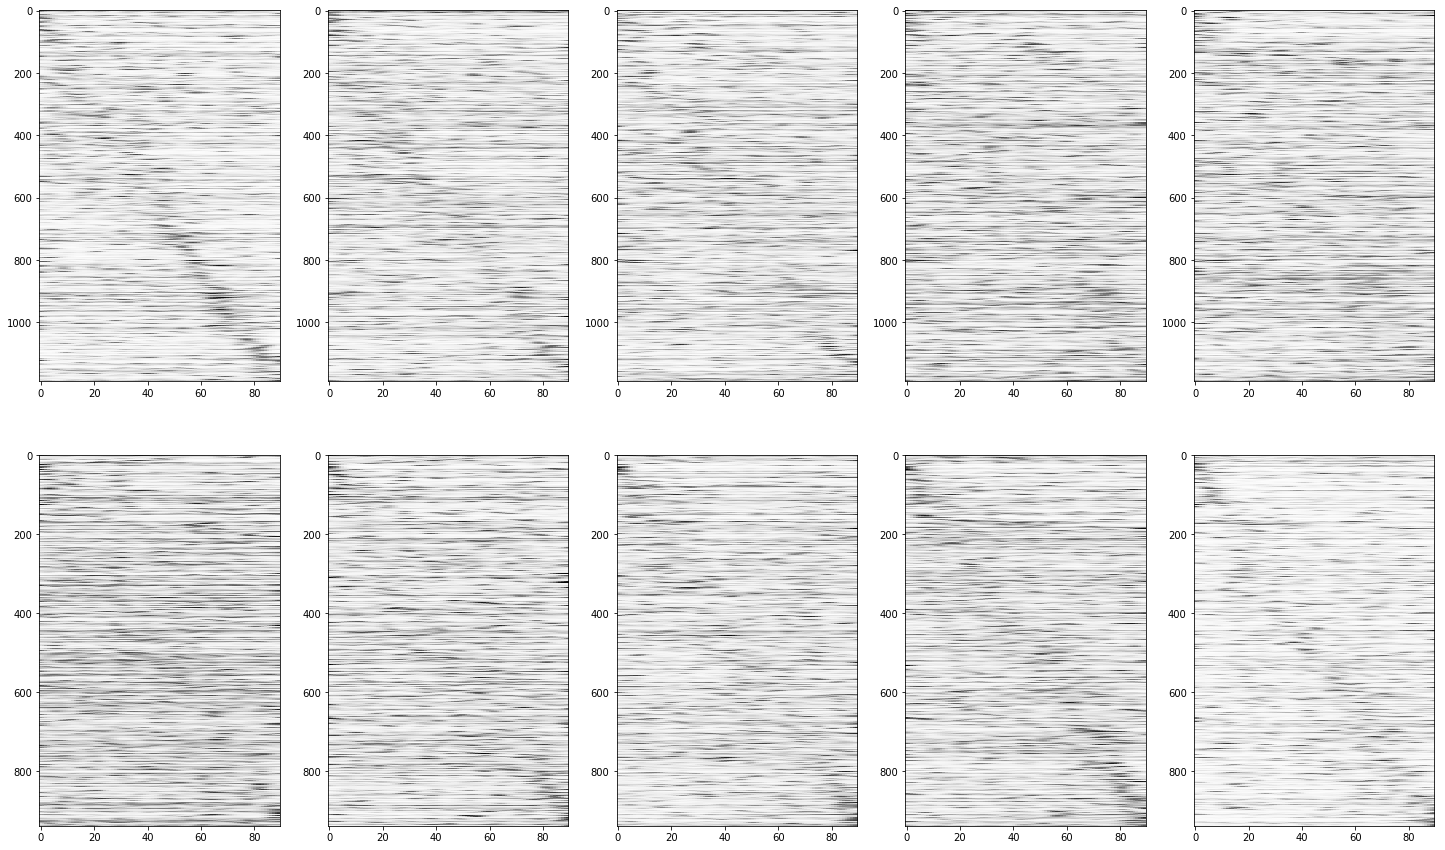

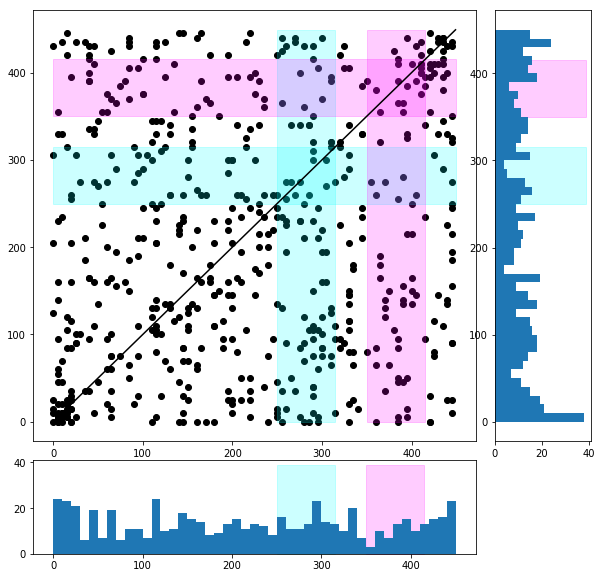

In [473]:
import PlaceCellAnalysis as pc
FR, masks, SI = pc.single_session(sess,savefigs=False,
                                deconv=True, win_trial_perm=True,
                                cell_method='s2p',method='bootstrap',morphlist=[0,.25,.5,.75,1])

num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463
frame diff 0
(1951, 90) (90, 1951)
(1951, 180) (90, 1951)
(1951, 270) (90, 1951)
(1951, 360) (90, 1951)


(array([[1.        , 0.99803659, 0.98451296, ..., 0.16577078, 0.16387903,
         0.16292328],
        [0.99803659, 1.        , 0.99354438, ..., 0.16800218, 0.16609816,
         0.16512668],
        [0.98451296, 0.99354438, 1.        , ..., 0.17111599, 0.16917735,
         0.16817076],
        ...,
        [0.16577078, 0.16800218, 0.17111599, ..., 1.        , 0.99609834,
         0.99083595],
        [0.16387903, 0.16609816, 0.16917735, ..., 0.99609834, 1.        ,
         0.99888382],
        [0.16292328, 0.16512668, 0.16817076, ..., 0.99083595, 0.99888382,
         1.        ]]),
 array([[1.        , 0.56173523, 0.41175728, 0.34052913, 0.3158842 ],
        [0.56173523, 1.        , 0.55539019, 0.48406419, 0.43094119],
        [0.41175728, 0.55539019, 1.        , 0.59834018, 0.56109215],
        [0.34052913, 0.48406419, 0.59834018, 1.        , 0.65916482],
        [0.3158842 , 0.43094119, 0.56109215, 0.65916482, 1.        ]]),
 (<Figure size 720x720 with 1 Axes>,
  <matplotlib.axes._

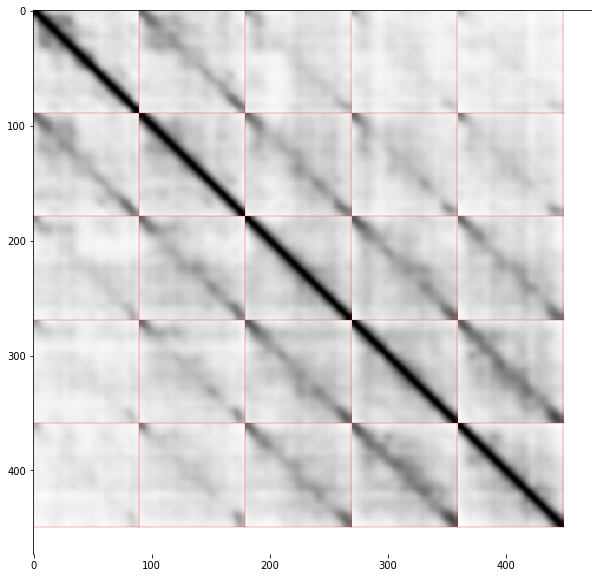

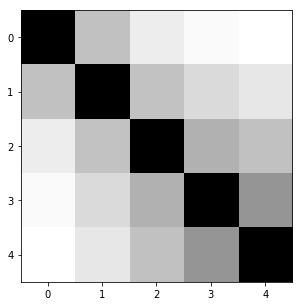

In [474]:
import SimilarityMatrixAnalysis as sm
sm.single_session(sess)

In [475]:
ORmask = np.array([masks[m] for m in masks.keys()]).sum(axis=0)>0

In [476]:
VRDat,C, S, A = pp.load_scan_sess(sess)



num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463
frame diff 0


In [477]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
lick_mat= u.make_pos_bin_trial_matrices(VRDat['lick']._values,
                                                            VRDat['pos']._values,
                                                            VRDat['tstart']._values,
                                                            VRDat['teleport']._values,
                                                            mat_only=True,bin_size=10)
speed_mat= u.make_pos_bin_trial_matrices(VRDat['speed']._values,
                                                            VRDat['pos']._values,
                                                            VRDat['tstart']._values,
                                                            VRDat['teleport']._values,
                                                            mat_only=True,bin_size=10)


In [478]:
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10,speed=VRDat.speed._values)
S_trial_mat[np.isnan(S_trial_mat)]=0
S_trial_mat = sp.ndimage.filters.gaussian_filter1d(S_trial_mat,3,axis=1)

In [479]:
effMorph = trial_info['morphs'] +  trial_info['wallJitter'] + trial_info['bckgndJitter']
msort = np.argsort(effMorph)
reward_pos = trial_info['reward_pos']
reward_pos[np.isnan(reward_pos)]=480

In [480]:
print(speed_mat/np.nanmax(speed_mat.ravel()))

[[0.47752879 0.47533025 0.53761813 ... 0.33104483 0.43555017 0.3998164 ]
 [0.51603166 0.58800637 0.59801971 ... 0.52795712 0.52357897 0.36180298]
 [0.46666729 0.44337475 0.41425246 ... 0.34549227 0.36662737 0.51360631]
 ...
 [0.47785117 0.44349436 0.42422172 ... 0.49556944 0.58442836 0.60383015]
 [0.62693959 0.64726505 0.6447856  ... 0.29088628 0.35530643 0.4702354 ]
 [0.40590188 0.25178635 0.26606421 ... 0.35842315 0.37051401 0.28373253]]


(<Figure size 1080x1080 with 3 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x20a96425208>])

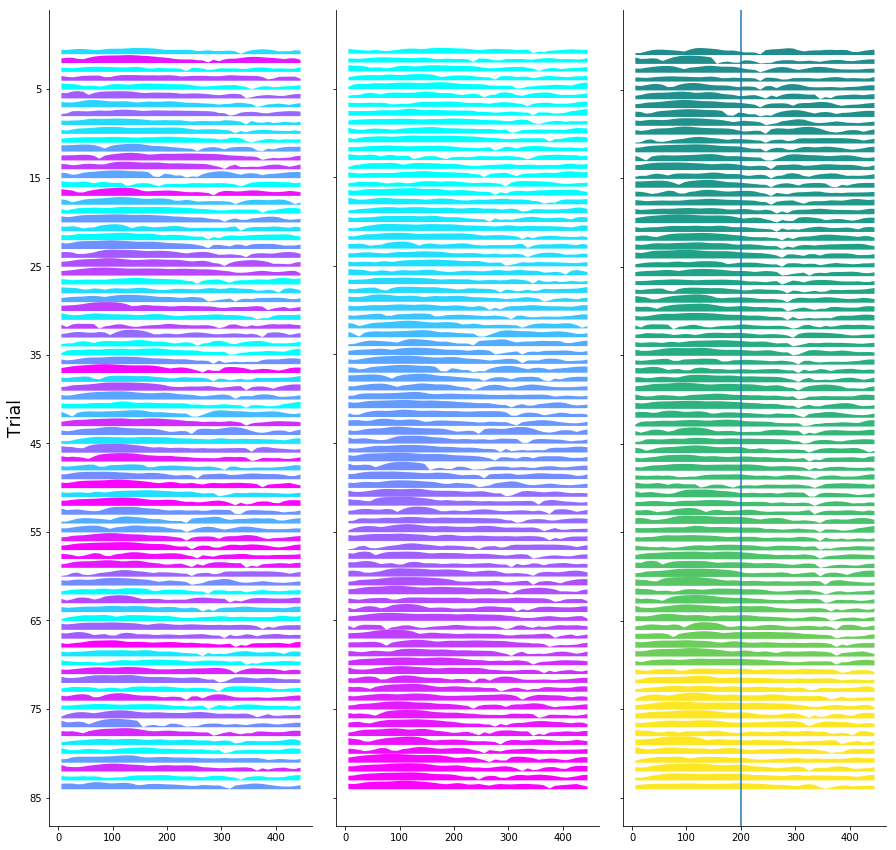

In [481]:
b.behavior_raster_foraging(speed_mat/np.nanmax(speed_mat.ravel()),centers,effMorph,reward_pos/480,smooth=False, max_pos=None)

(<Figure size 1080x1080 with 3 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x20ab212e278>])

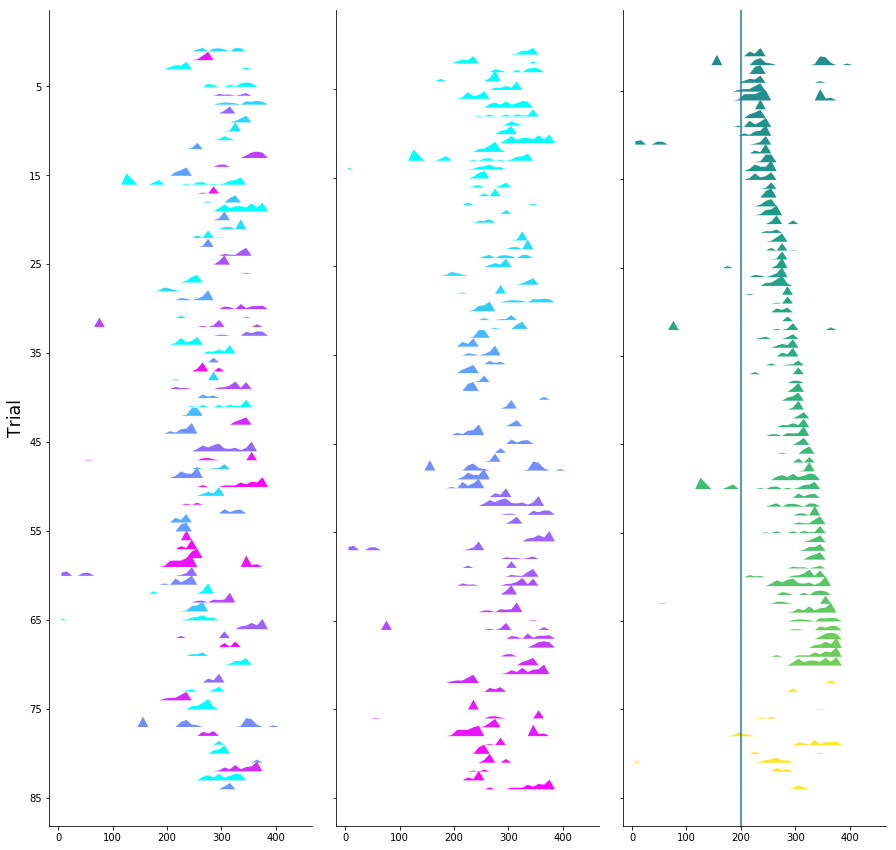

In [482]:
b.behavior_raster_foraging(lick_mat,centers,effMorph,reward_pos/480,smooth=False, max_pos=None)

In [483]:
S_pc = S_trial_mat[:,:,ORmask]
# S_pc = S_trial_mat[:,:,:]
# nanmask = 1-np.isnan(S_pc)

In [484]:
# S_tmat = sp.stats.zscore(np.reshape(S_pc,[S_trial_mat.shape[0],-1]),axis=-1)
S_tmat = np.reshape(S_pc,[S_trial_mat.shape[0],-1])
S_tmat = S_tmat/np.linalg.norm(S_tmat,ord=2,axis=-1)[:,np.newaxis]
# nanmask = np.reshape(nanmask,[S_trial_mat.shape[0],-1])

In [485]:
S_t_rmat = np.matmul(S_tmat,S_tmat.T) #/np.matmul(nanmask,nanmask.T)

In [486]:
print(S_t_rmat.shape)
print(S_t_rmat)

(85, 85)
[[1.         0.33434181 0.37660259 ... 0.42733663 0.36395823 0.37755241]
 [0.33434181 1.         0.31687021 ... 0.34698805 0.38362414 0.3600954 ]
 [0.37660259 0.31687021 1.         ... 0.50183743 0.36759797 0.36161843]
 ...
 [0.42733663 0.34698805 0.50183743 ... 1.         0.42160473 0.41272385]
 [0.36395823 0.38362414 0.36759797 ... 0.42160473 1.         0.39418893]
 [0.37755241 0.3600954  0.36161843 ... 0.41272385 0.39418893 1.        ]]


In [487]:
import sklearn as sk
import sklearn.cluster as clust


In [488]:
score = []
for c in range(2,10):
    spectclust = clust.SpectralClustering(n_clusters=c,affinity='precomputed')
    labels = spectclust.fit_predict(S_t_rmat)
    
    
#     aggclust = clust.AgglomerativeClustering(n_clusters=c,affinity='cosine',linkage="average")
#     aggclust.fit(S_tmat)
#     s=sk.metrics.silhouette_score(S_tmat,aggclust.labels_,metric='cosine')
    s=sk.metrics.silhouette_score(S_tmat,labels,metric='cosine')
    score.append(np.round(100.*s))
    print(s*100.)
    

c = np.argmax(score)+2


# aggclust = clust.AgglomerativeClustering(n_clusters=c,affinity='cosine',linkage="average")
# aggclust.fit(S_tmat)
spectclust = clust.SpectralClustering(n_clusters=c,affinity='precomputed')
spectclust.fit(S_t_rmat)

5.31915243846244
4.6051292366172785
3.865724421062379
3.268501674119247
2.3500629213393474
2.026772959079421
1.9638910813342076
1.8490897456301343


SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
          n_neighbors=10, random_state=None)

2


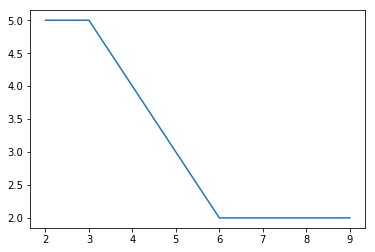

In [489]:
f,ax= plt.subplots()
ax.plot(np.arange(2,10),score)
print(c)

In [490]:
# clustsort = np.argsort(aggclust.labels_)
# clustsort = np.argsort(spectclust.labels_)

# sort clusters by average morph values 
clustmean = np.array([effMorph[spectclust.labels_==i].mean() for i in range(c)])
clusterOrder = np.argsort(clustmean)
labels = np.zeros(effMorph.shape)

for i,cl in enumerate(clusterOrder.tolist()):
    labels[spectclust.labels_==cl]=i
    
clustsort = np.argsort(labels)  


[]

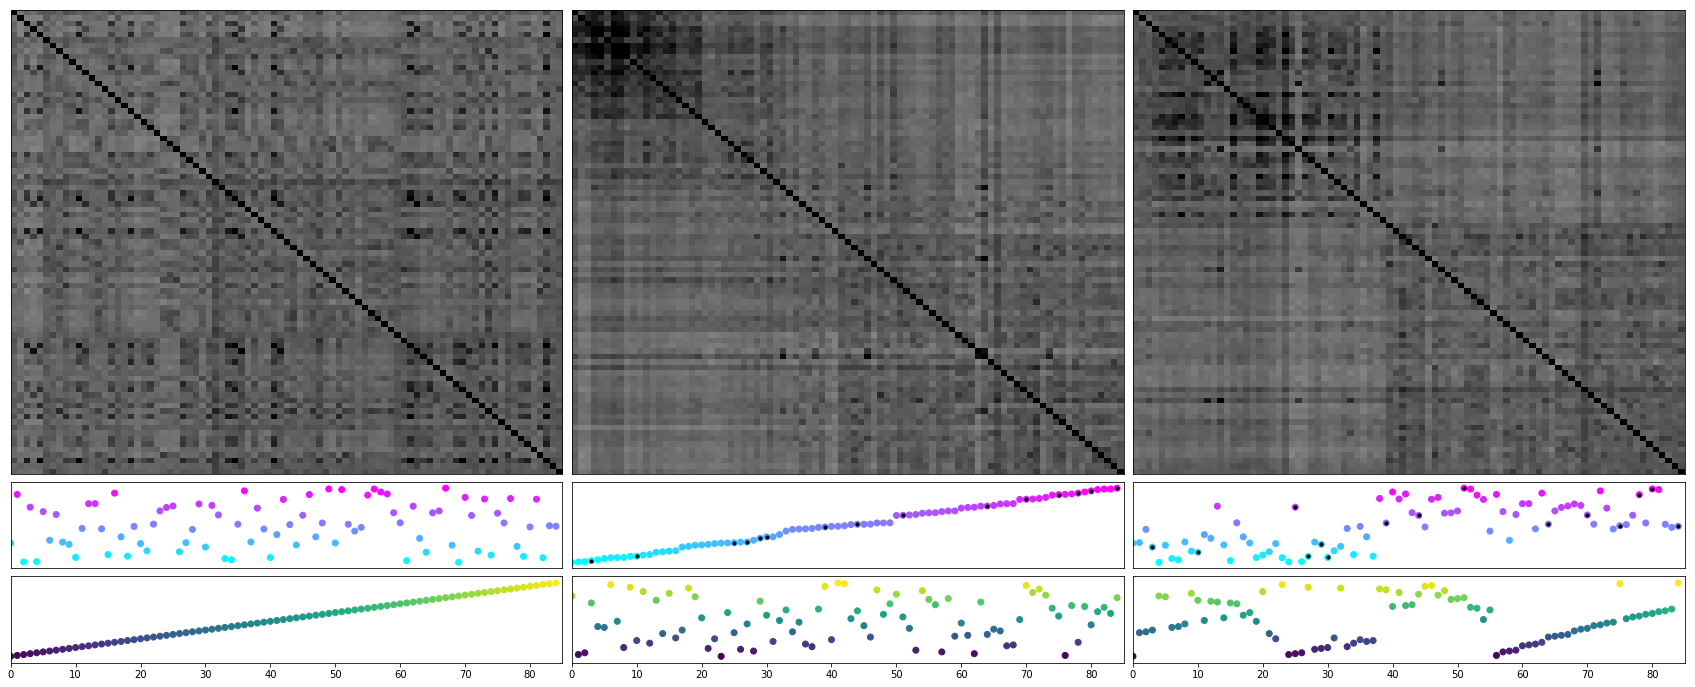

In [500]:
import matplotlib.gridspec as gridspec
f = plt.figure(figsize=[30,12])
gs = gridspec.GridSpec(14,30)
x=np.arange(effMorph.size)
rmask = trial_info['rewards']==0
tnumber = np.arange(x.shape[0])/x.shape[0]
vmax = .55
# f,ax = plt.subplots(2,3,figsize=[20,10],sharex=True)
ax = f.add_subplot(gs[:10,:10])
ax.imshow(S_t_rmat,cmap='Greys',vmin=0,vmax=vmax,aspect='auto')
ax.set_yticks([])
ax.set_xticks([])
ax = f.add_subplot(gs[10:12,:10])
ax.scatter(x,effMorph,c=effMorph,cmap='cool')
ax.set_xlim([0,x.shape[0]])
ax.set_yticks([])
ax.set_xticks([])
ax = f.add_subplot(gs[12:,:10])
ax.scatter(x,tnumber,c=tnumber,cmap='viridis')
ax.set_xlim([0,x.shape[0]])
ax.set_yticks([])
# ax[0,0].imshow(S_t_rmat,cmap='Greys',vmin=0,vmax=.5,aspect='auto')
S_agg_sort = S_t_rmat[clustsort,:]
S_agg_sort = S_agg_sort[:,clustsort]
S_rmat_sort = S_t_rmat[msort,:]
S_rmat_sort = S_rmat_sort[:,msort]


ax = f.add_subplot(gs[:10,10:20])
ax.imshow(S_rmat_sort,cmap='Greys',vmin=0,vmax=vmax,aspect='auto')
ax.set_yticks([])
ax.set_xticks([])
ax = f.add_subplot(gs[10:12,10:20])
ax.scatter(x,effMorph[msort],c=effMorph[msort],cmap='cool')
ax.scatter(x[rmask],effMorph[msort[rmask]],c='black',s=10)
ax.set_xlim([0,x.shape[0]])
ax.set_yticks([])
ax.set_xticks([])
ax = f.add_subplot(gs[12:,10:20])
ax.scatter(x,tnumber[msort],c=tnumber[msort],cmap='viridis')
ax.set_xlim([0,x.shape[0]])
ax.set_yticks([])


ax = f.add_subplot(gs[:10,20:])
ax.imshow(S_agg_sort,cmap='Greys',vmin=0,vmax=vmax,aspect='auto')
ax.set_yticks([])
ax.set_xticks([])
ax = f.add_subplot(gs[10:12,20:])
ax.scatter(x,effMorph[clustsort],c=effMorph[clustsort],cmap='cool')
ax.set_yticks([])
ax.set_xticks([])
# tmpeff = np.copy(effMorph[1:])
# ax.scatter(x[:-1],tmpeff[clustsort[1:]],c=tmpeff[clustsort[1:]],cmap='cool')
ax.scatter(x[rmask],effMorph[clustsort[rmask]],c='black',s=10)
ax.set_xlim([0,x.shape[0]])
ax = f.add_subplot(gs[12:,20:])
ax.scatter(x,tnumber[clustsort],c=tnumber[clustsort],cmap='viridis')
ax.set_xlim([0,x.shape[0]])
ax.set_yticks([])


In [492]:
lem = sk.manifold.SpectralEmbedding(affinity='precomputed',n_components=3)


In [493]:
X = lem.fit_transform(S_t_rmat)

In [494]:
# lem = sk.manifold.MDS(dissimilarity='precomputed')
# X = lem.fit_transform(1-S_t_rmat)

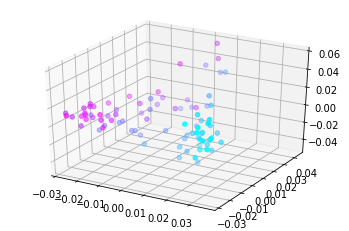

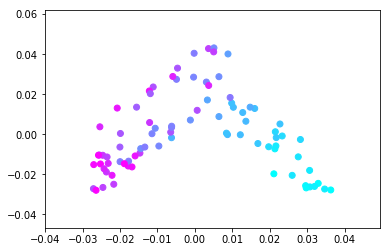

In [495]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=effMorph,cmap='cool')

f,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=effMorph,cmap='cool')



In [498]:
print(SI.keys())
SI_total = [SI[m]['all'] for m in [0,.25,.5,.75,1]]
SIt = SI_total[0]
for ind in SI_total[1:]:
    SIt+=ind

order = np.argsort(SIt)[::-1]

dict_keys([0, 0.25, 0.5, 0.75, 1])


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


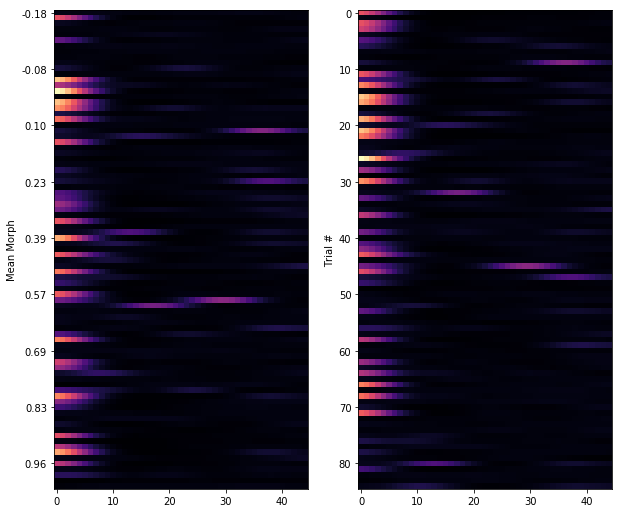

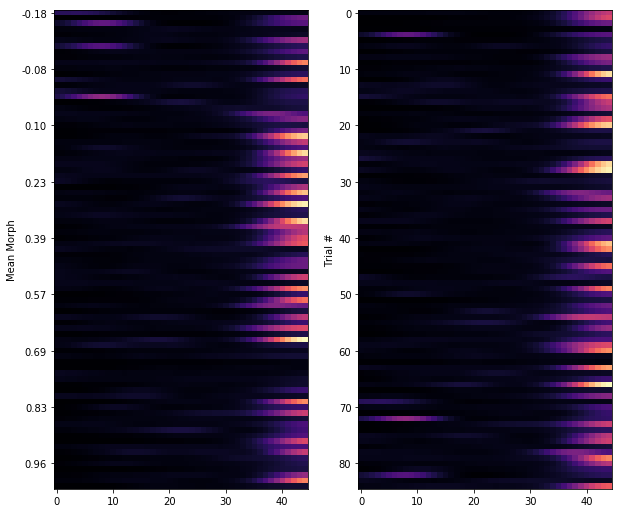

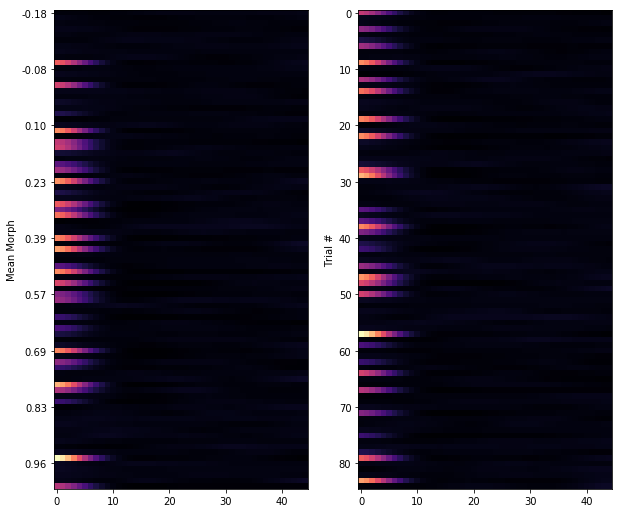

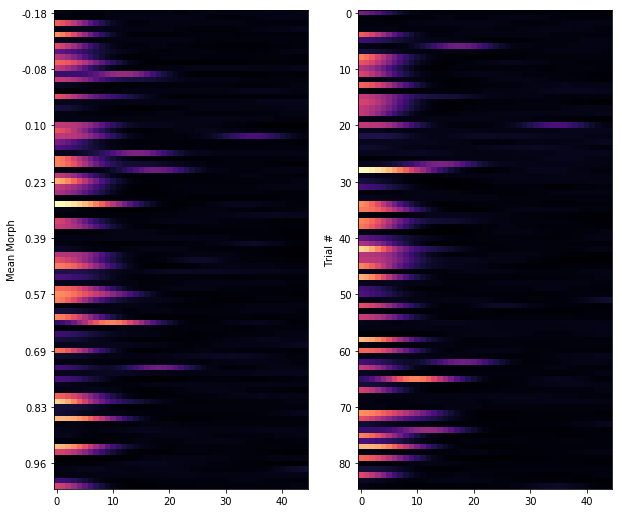

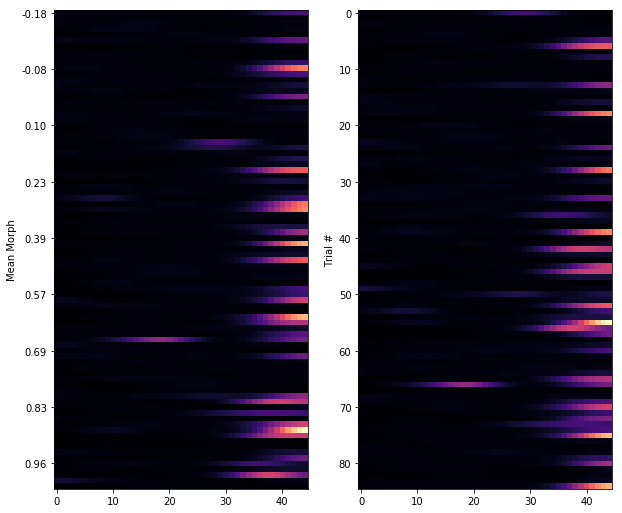

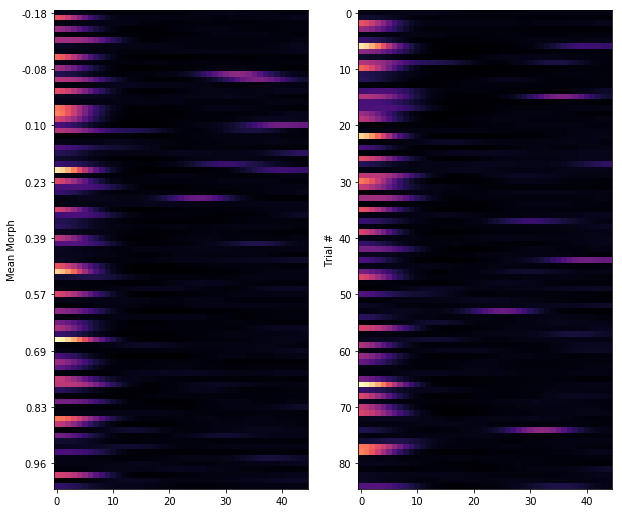

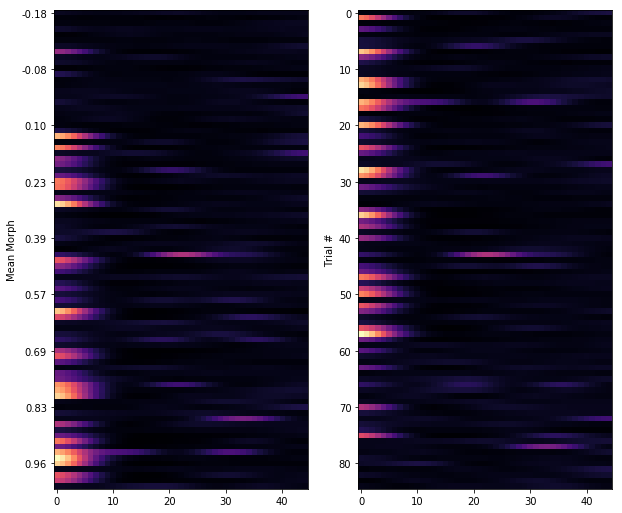

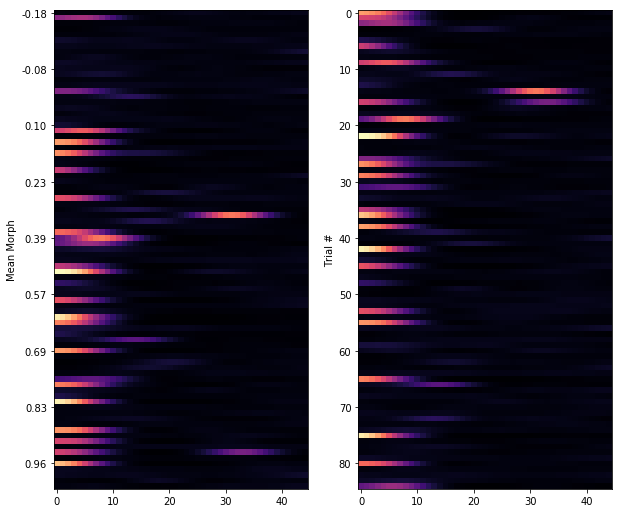

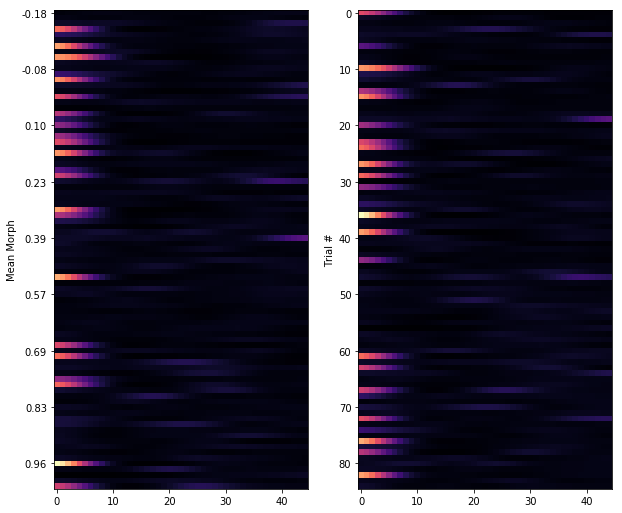

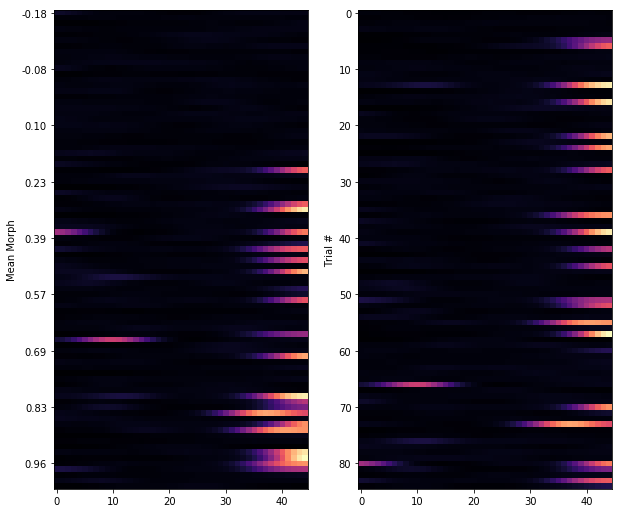

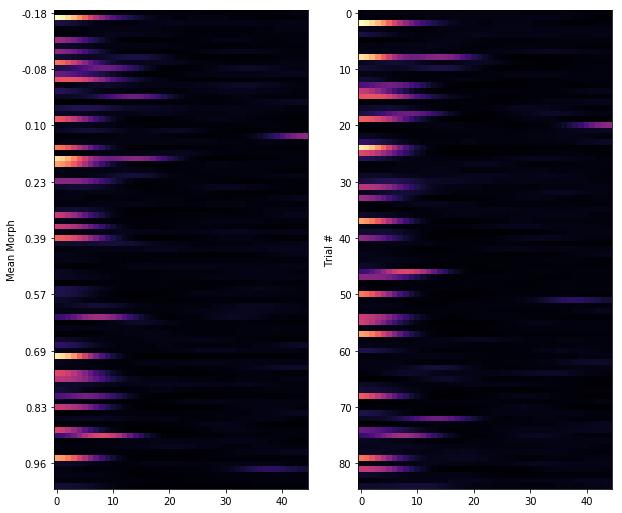

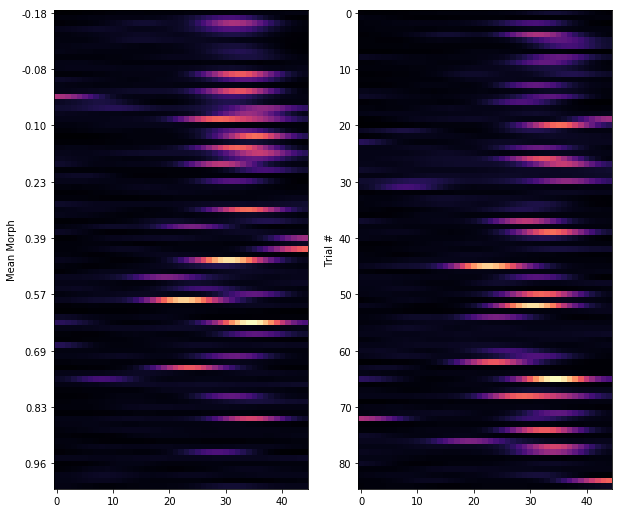

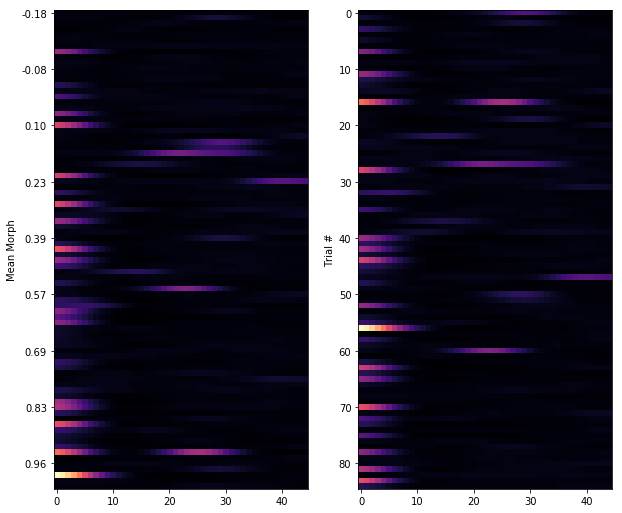

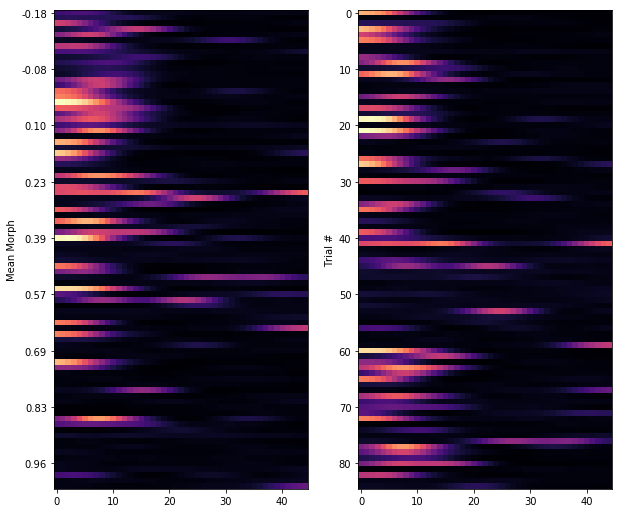

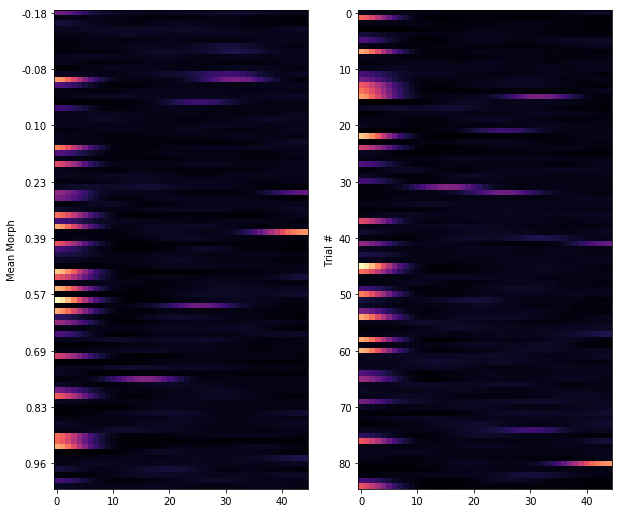

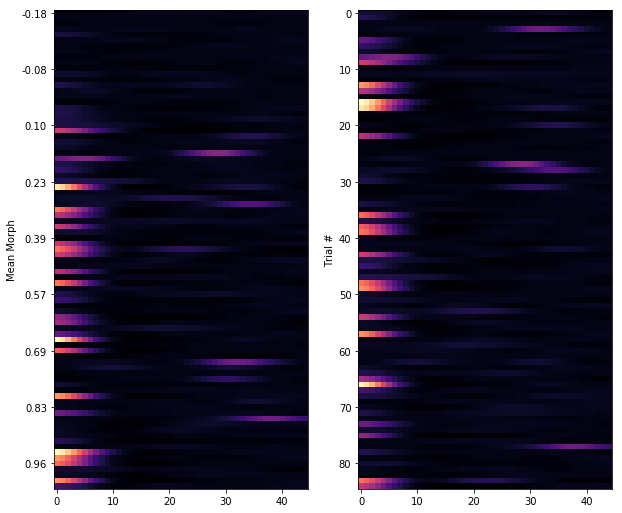

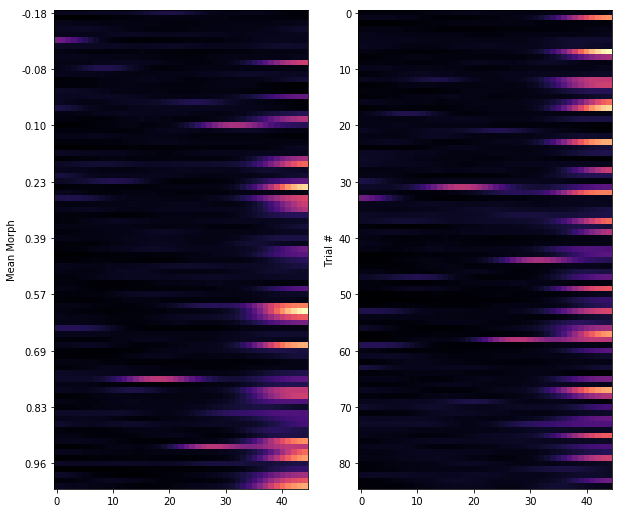

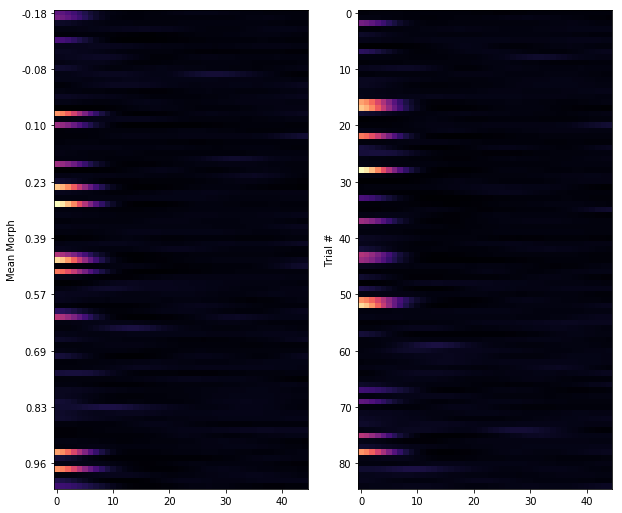

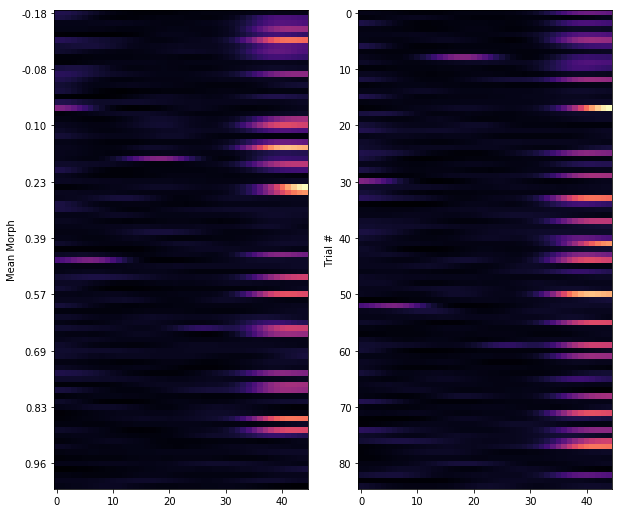

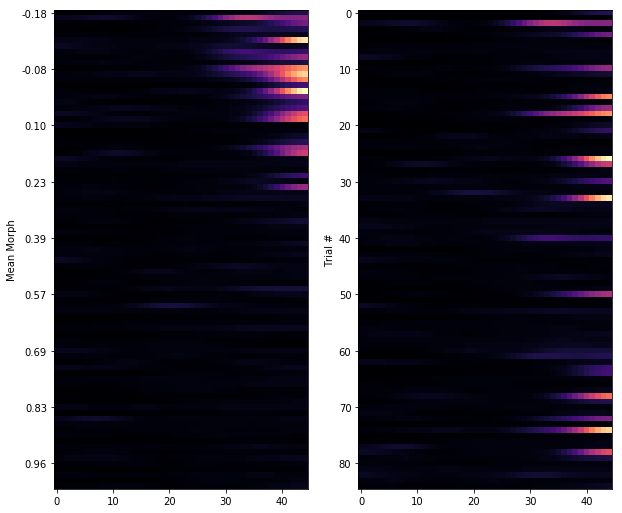

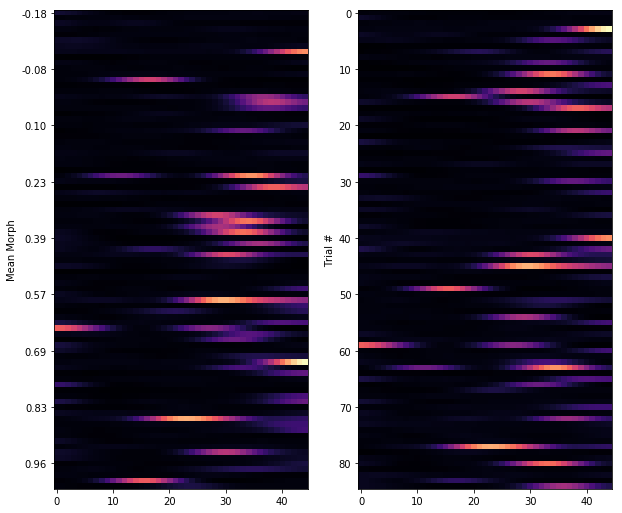

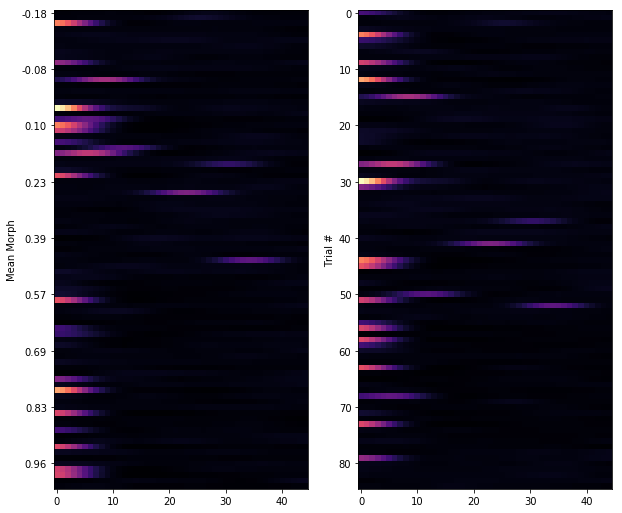

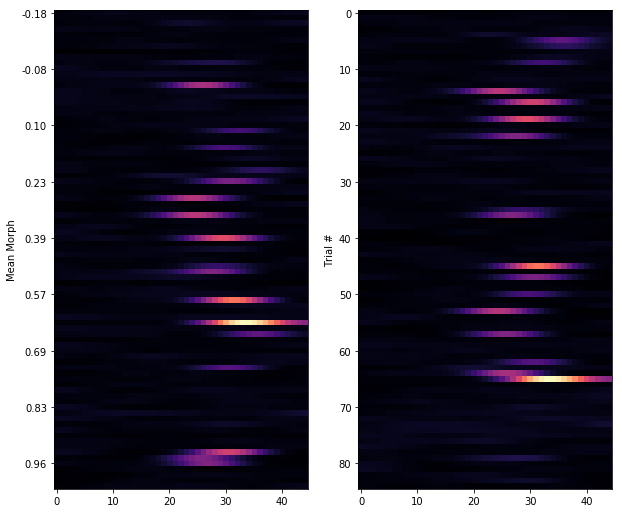

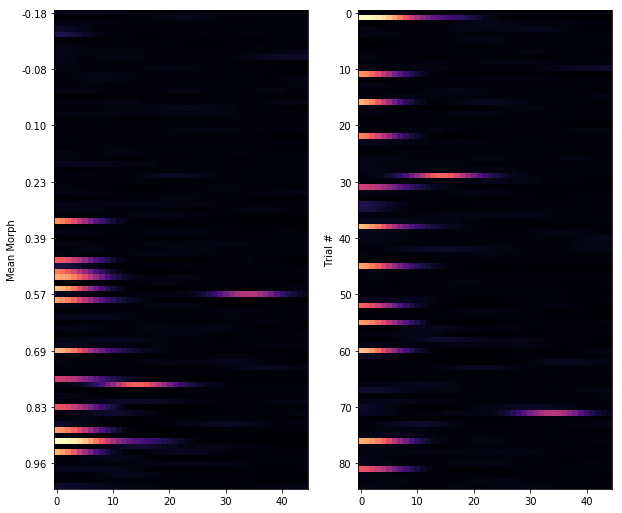

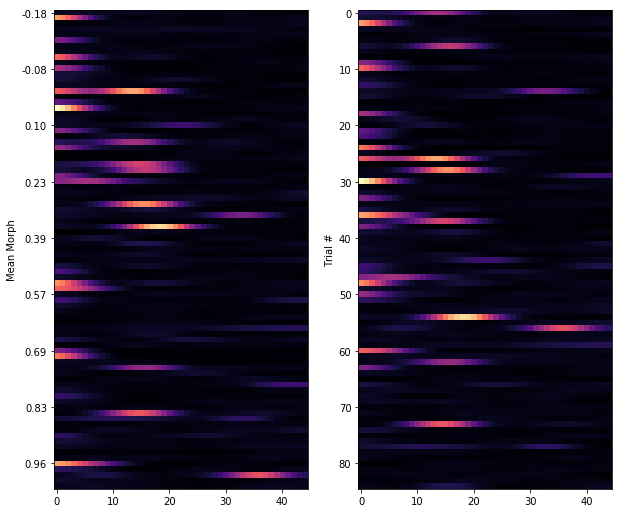

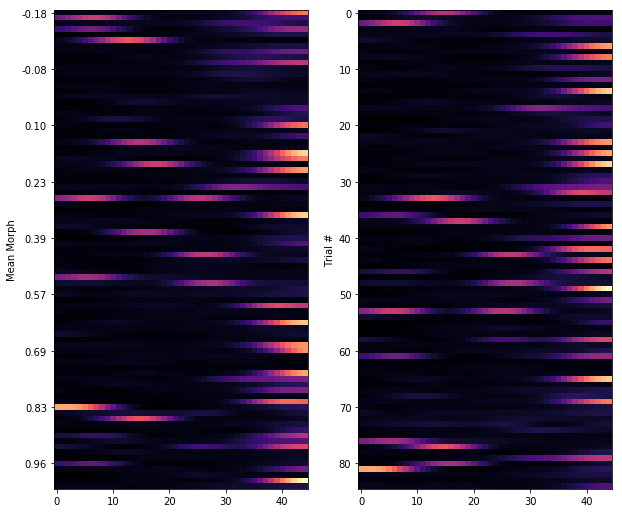

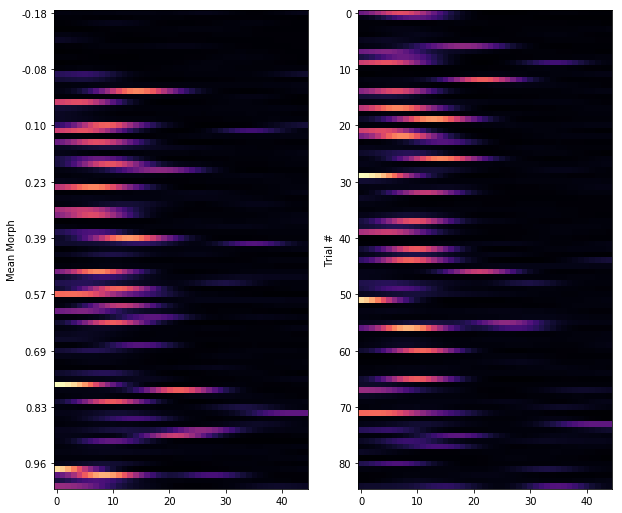

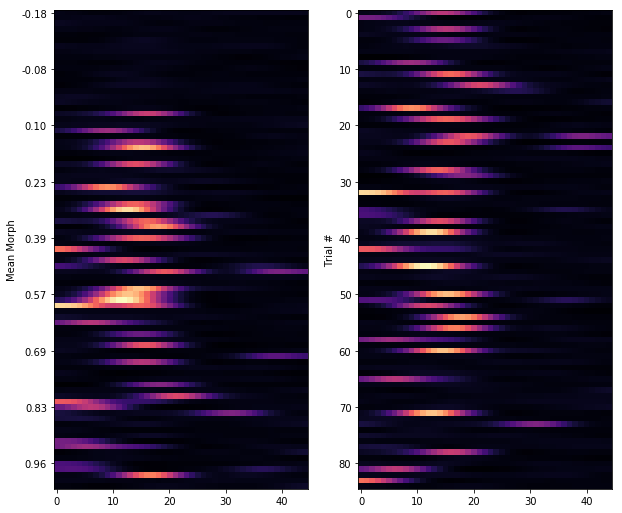

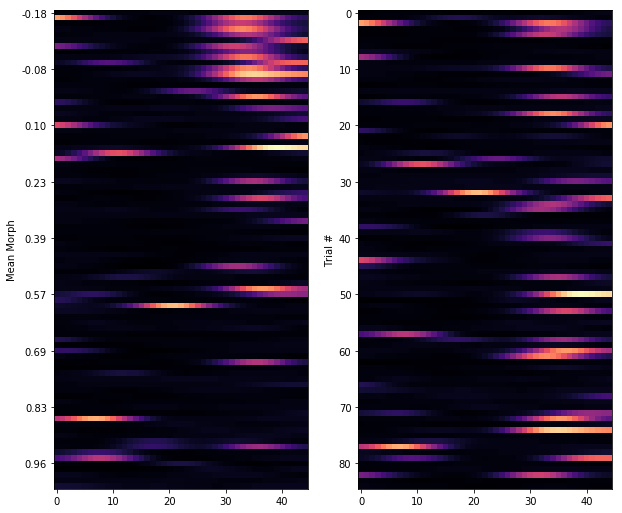

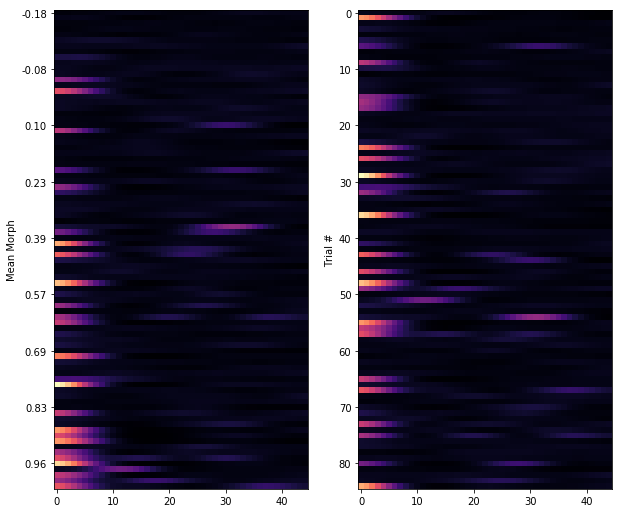

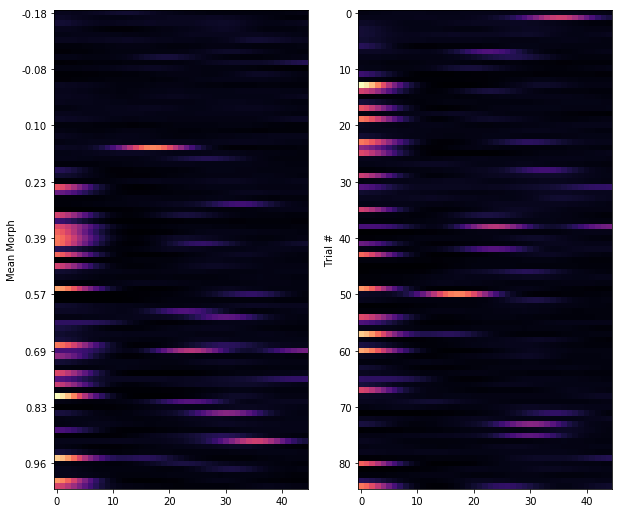

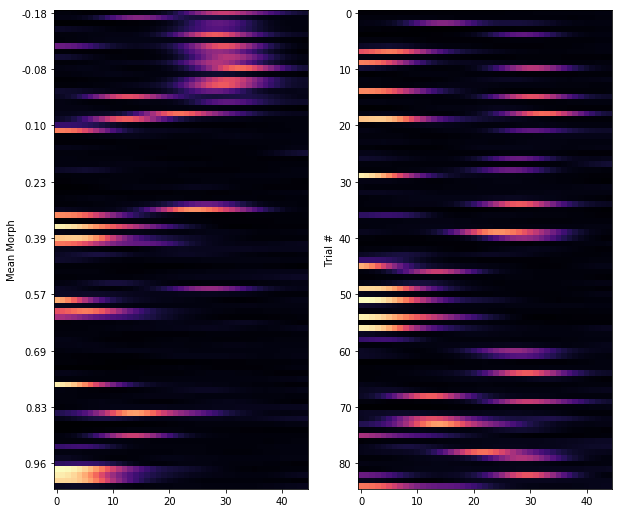

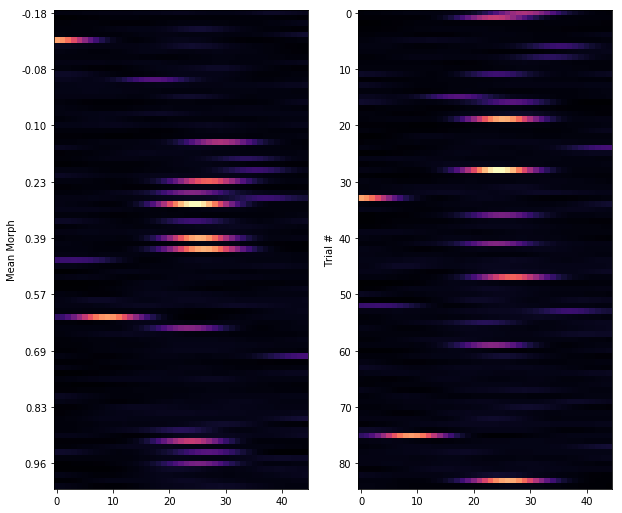

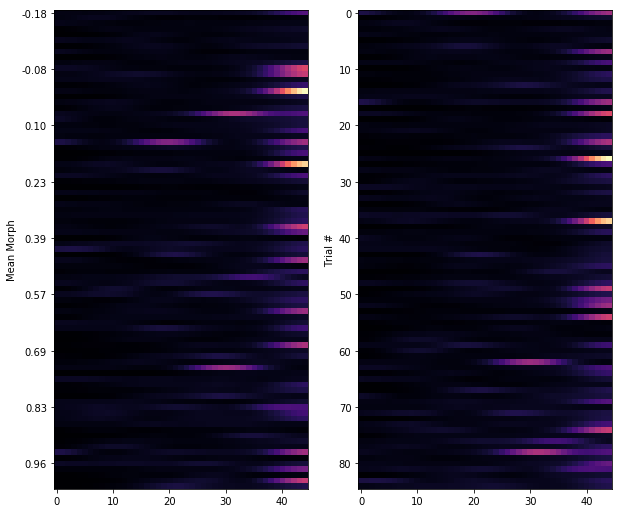

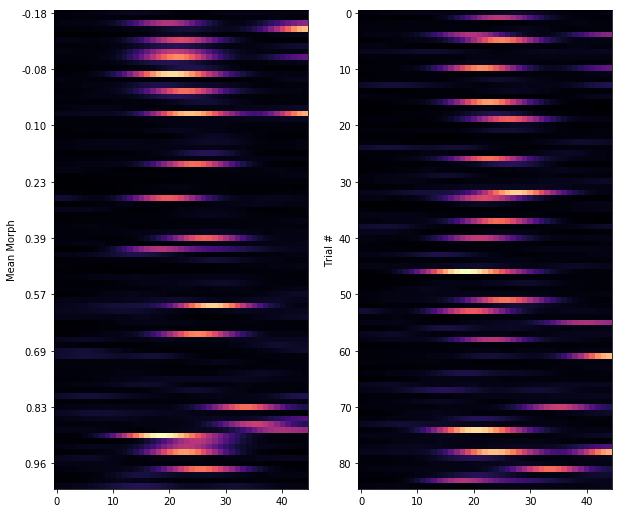

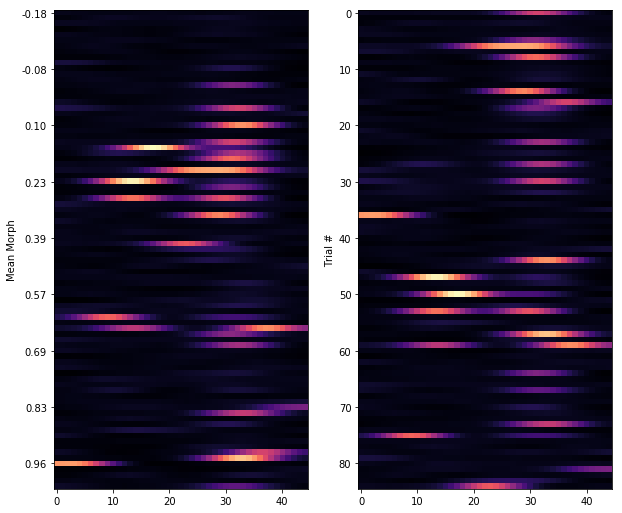

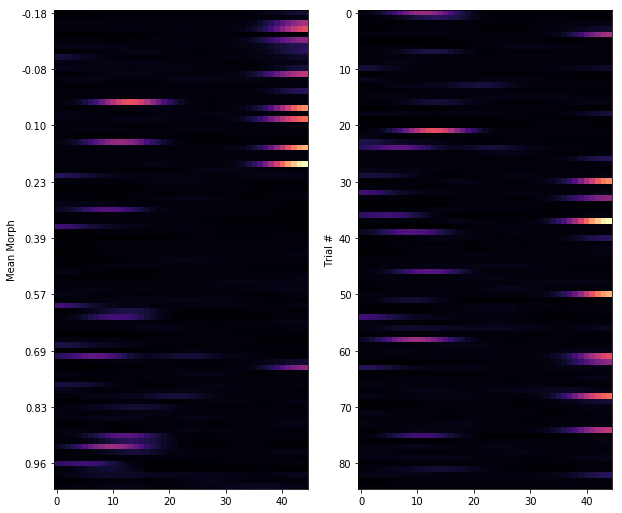

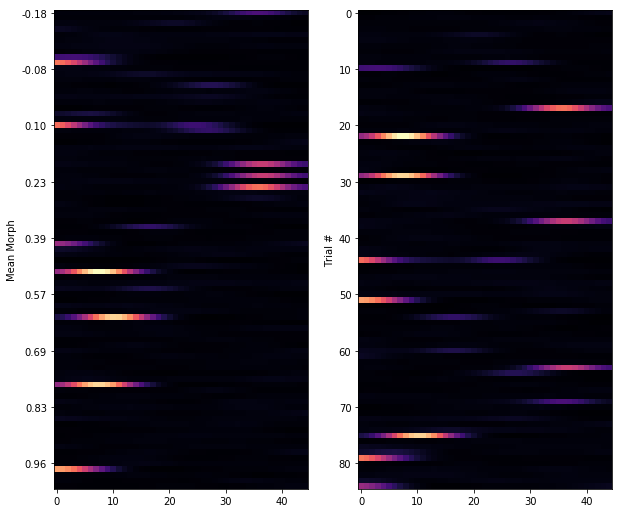

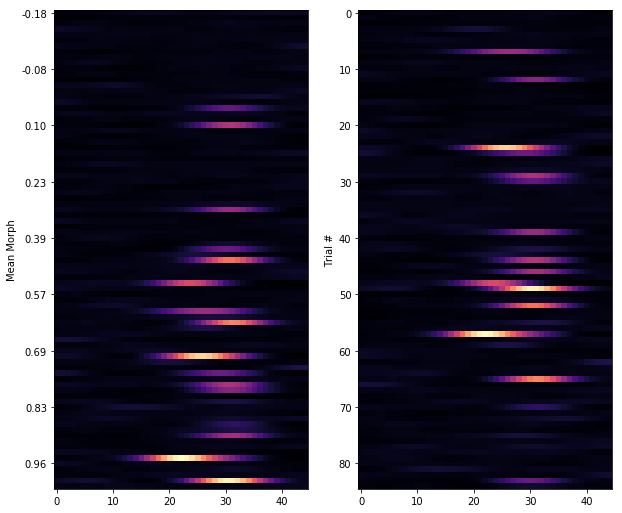

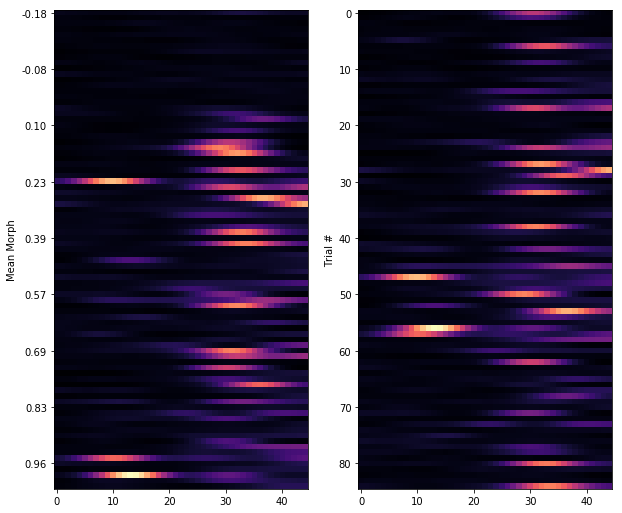

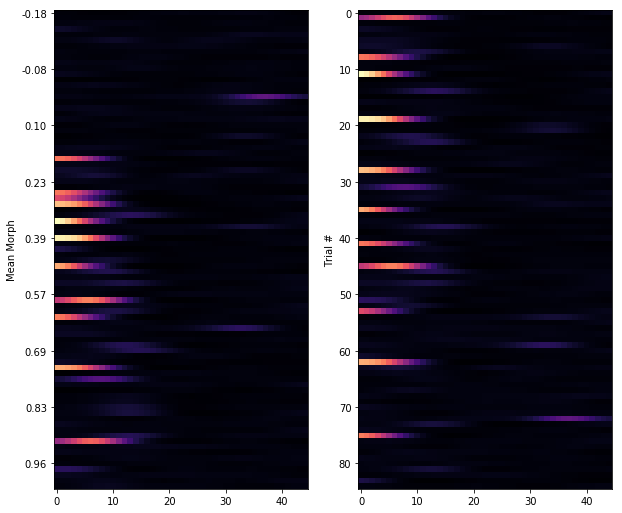

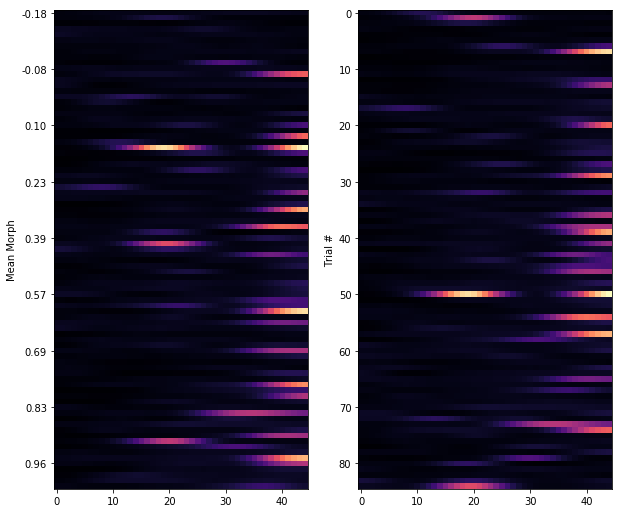

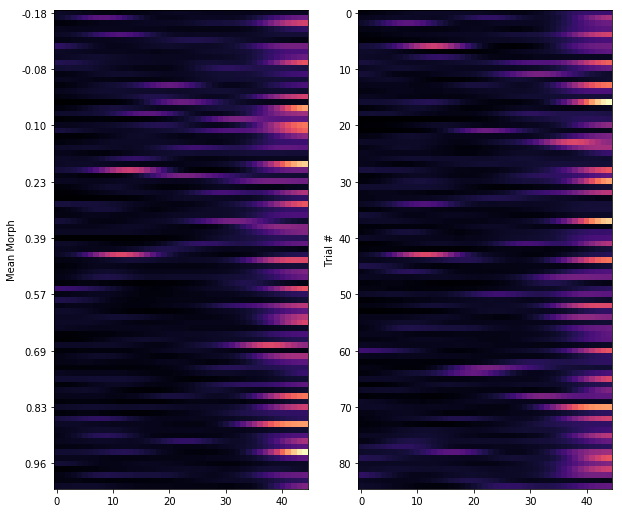

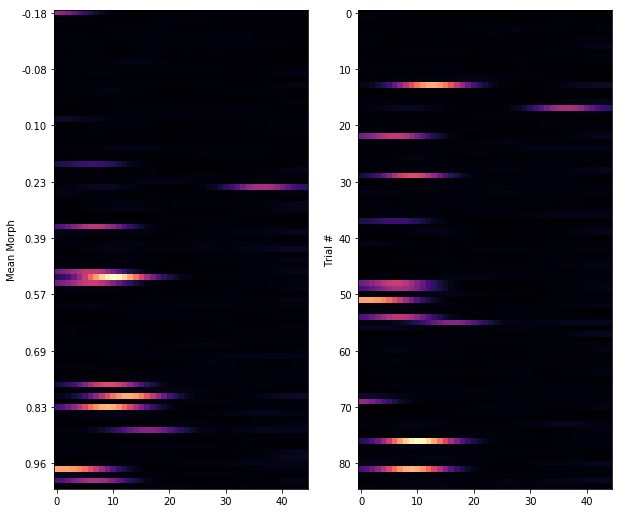

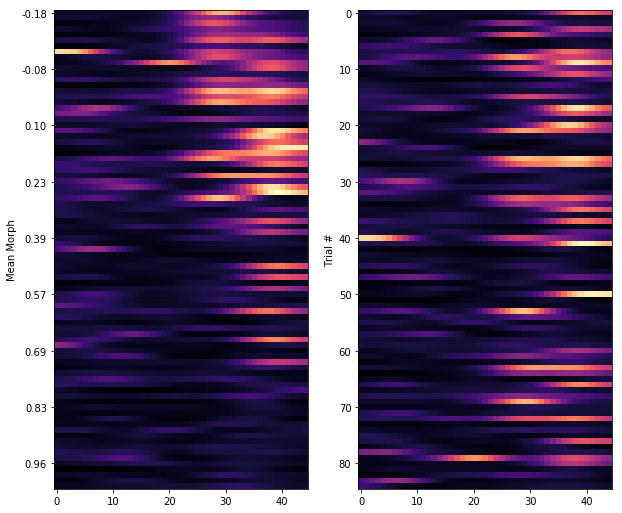

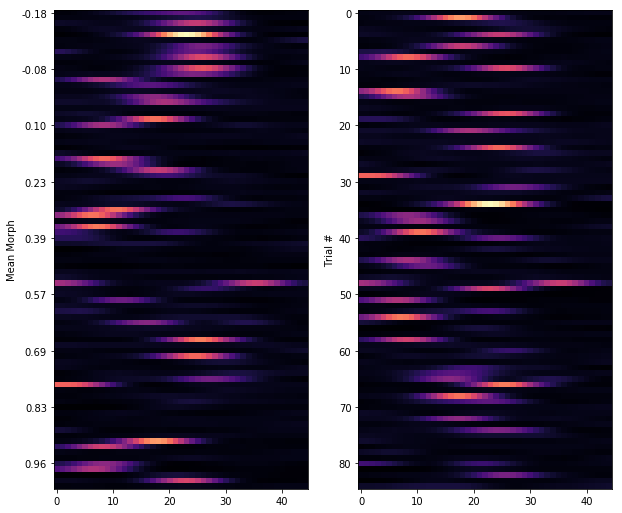

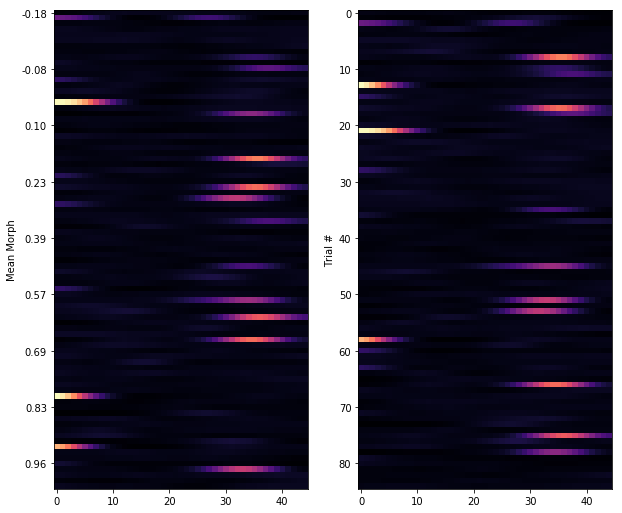

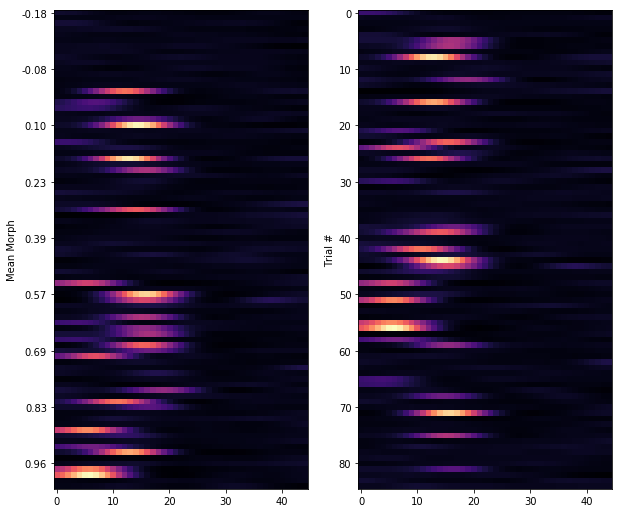

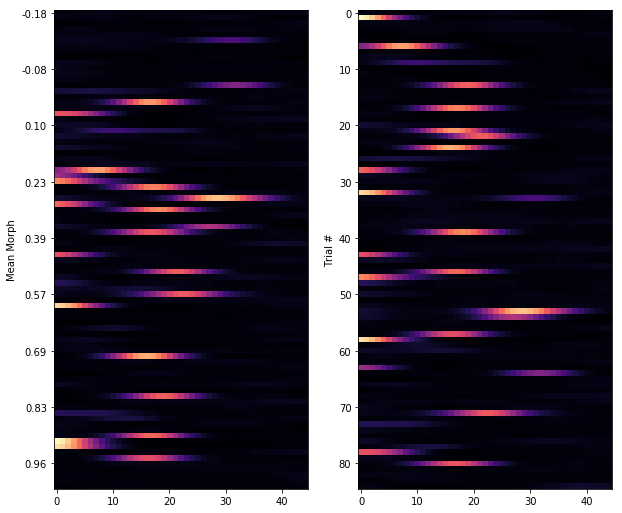

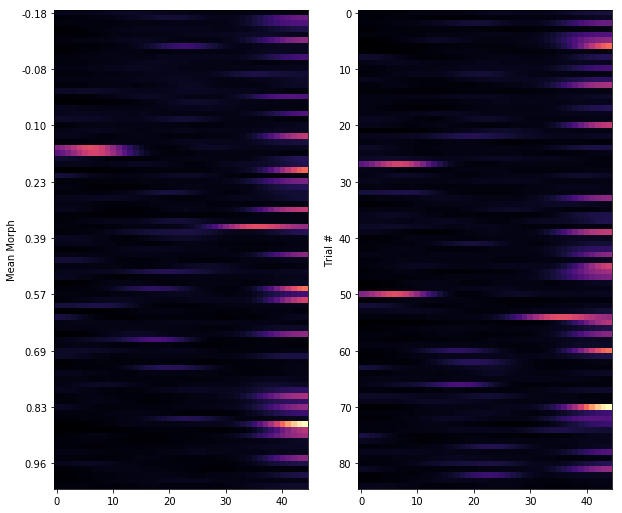

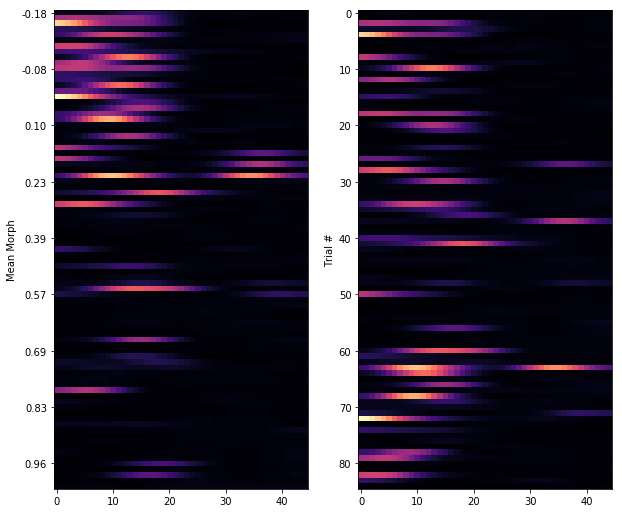

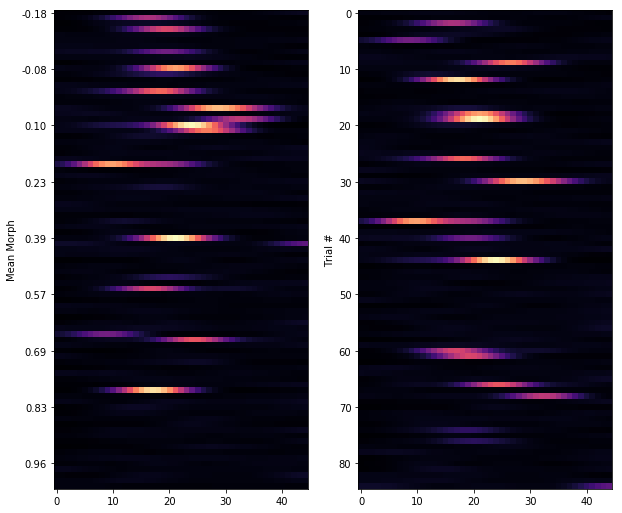

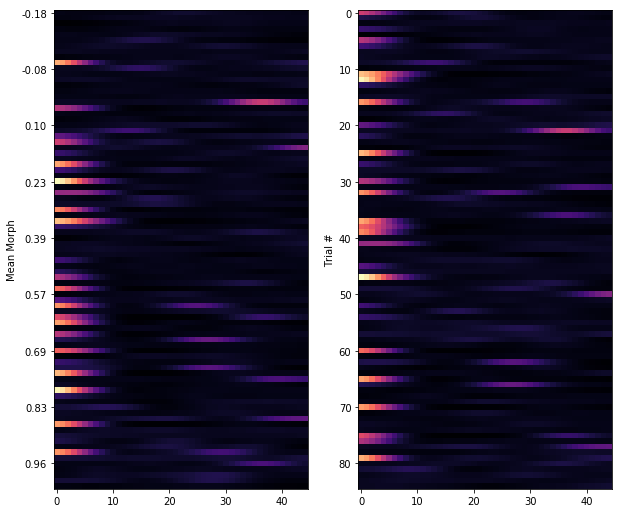

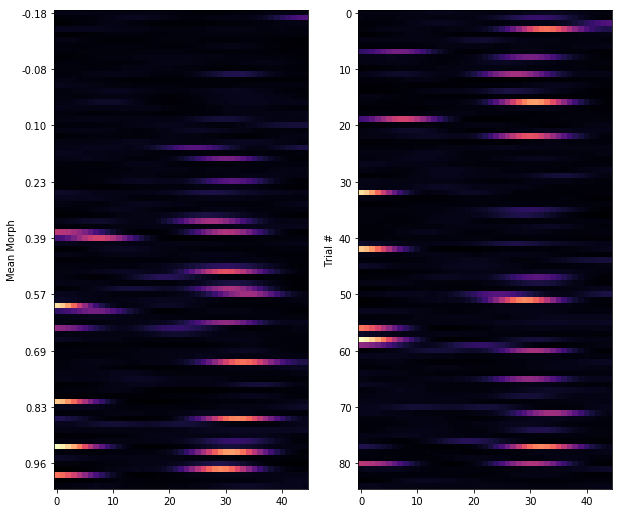

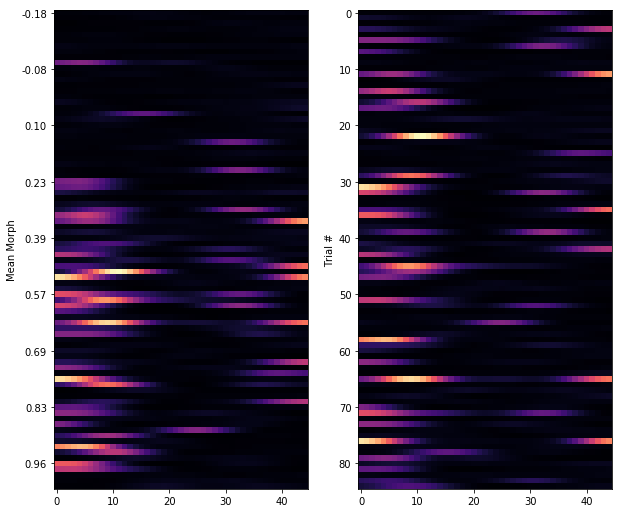

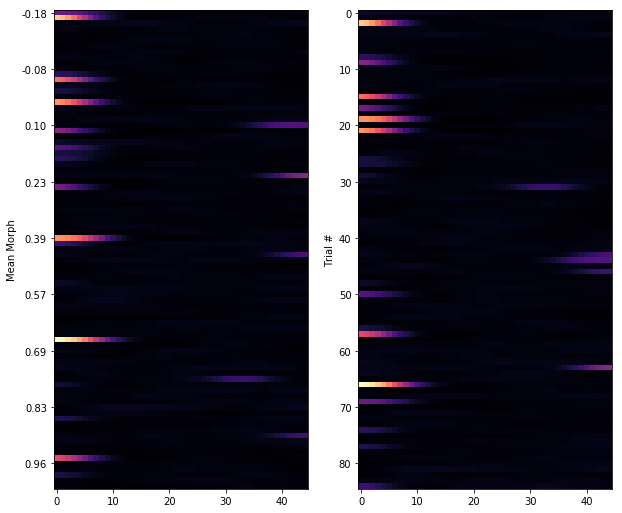

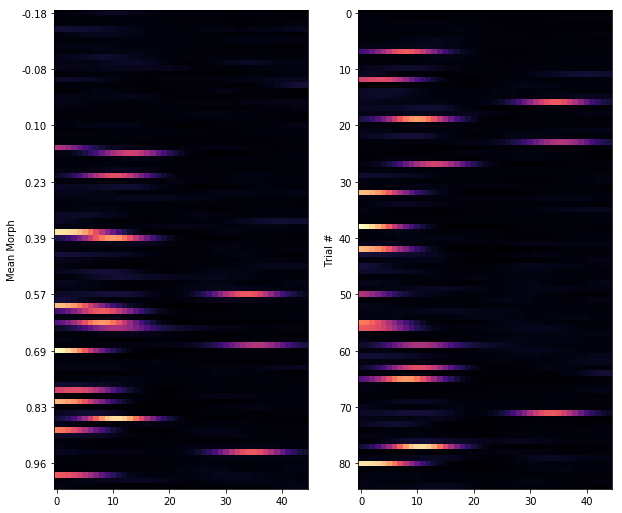

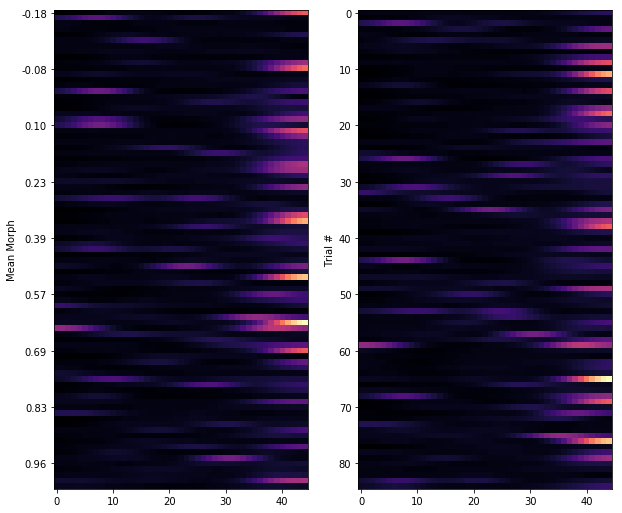

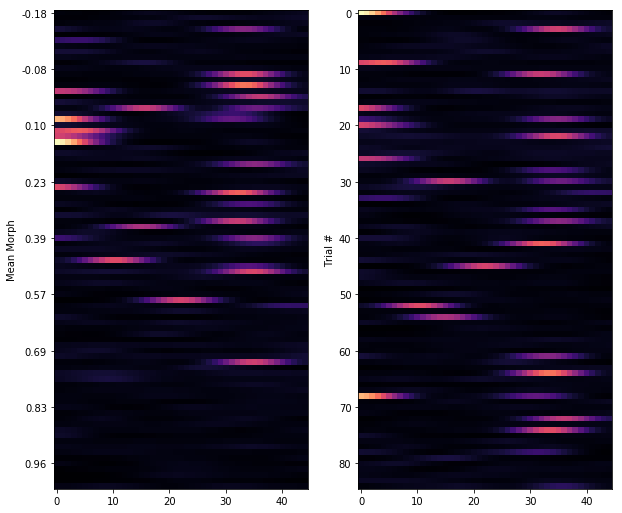

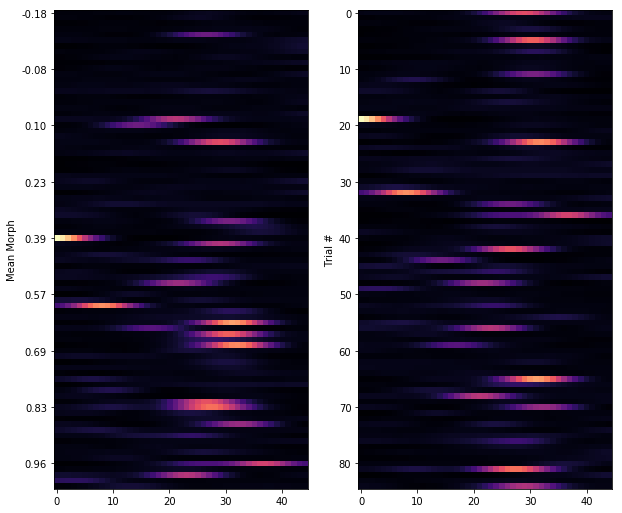

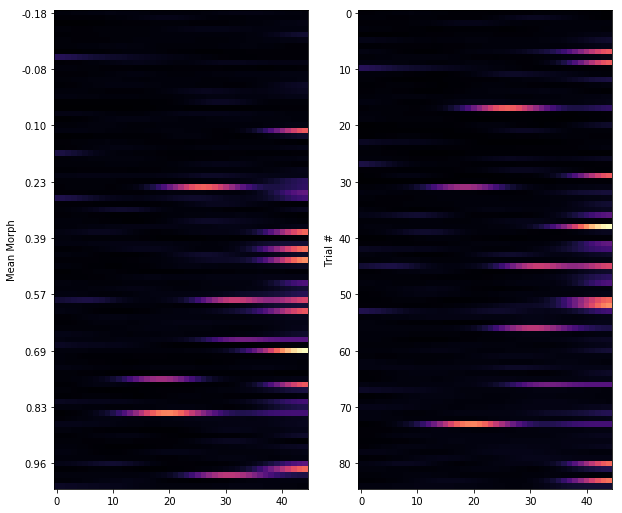

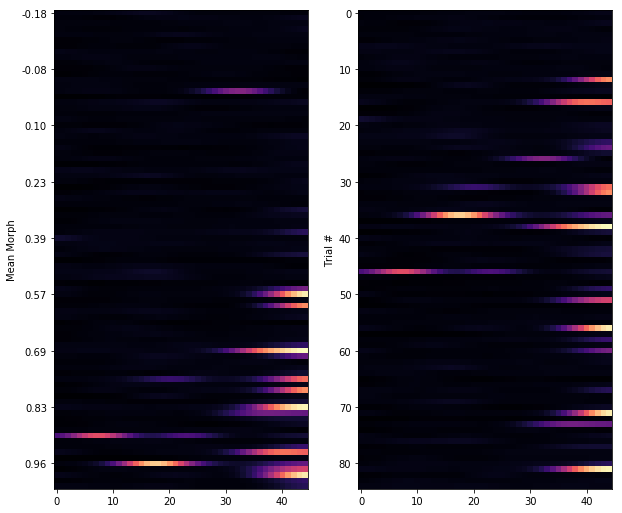

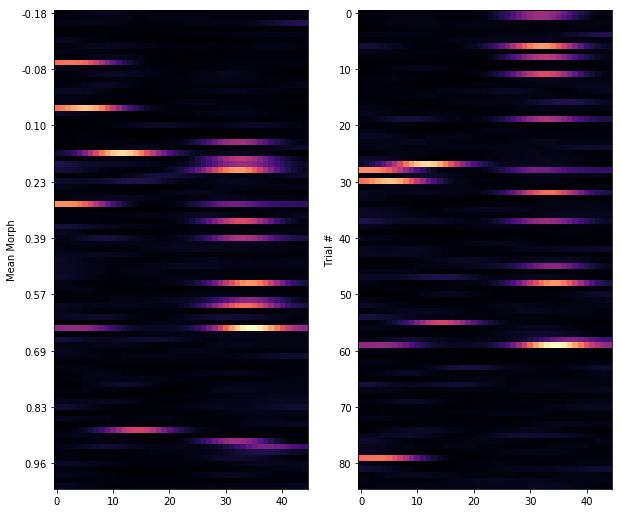

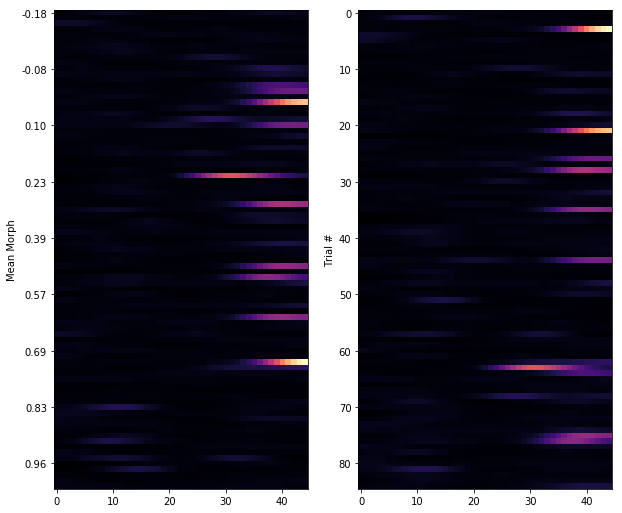

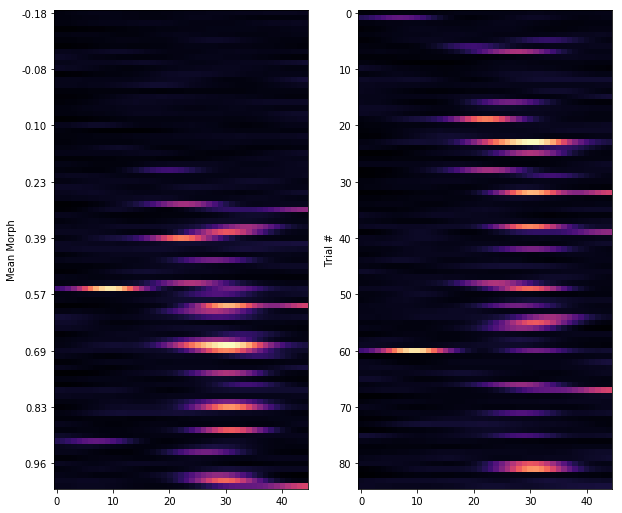

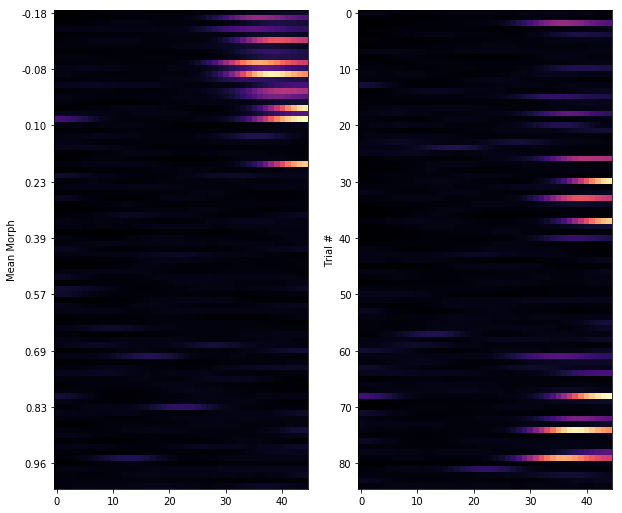

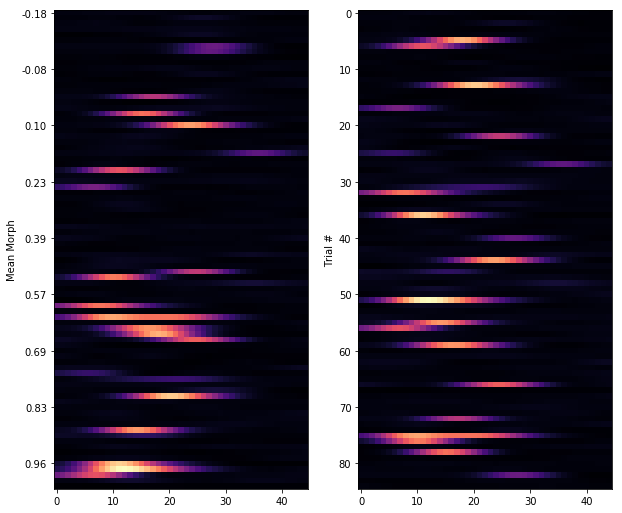

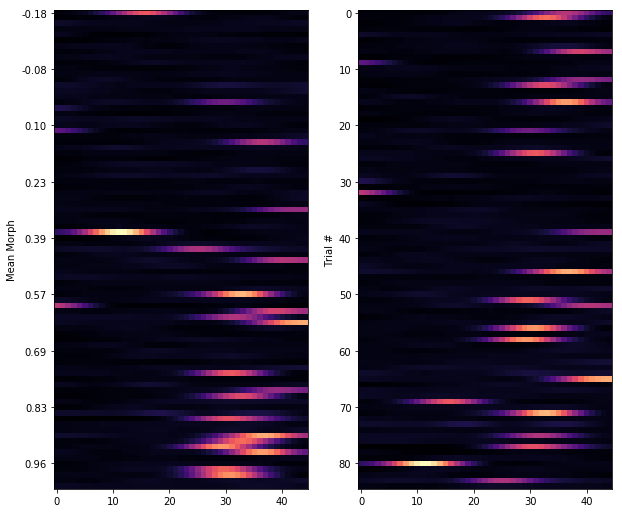

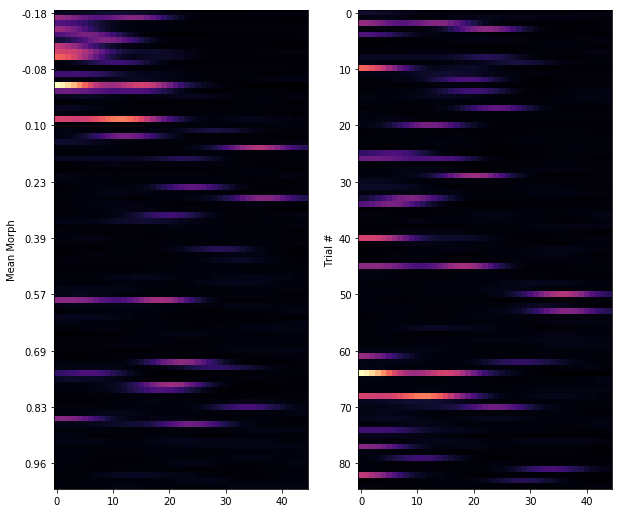

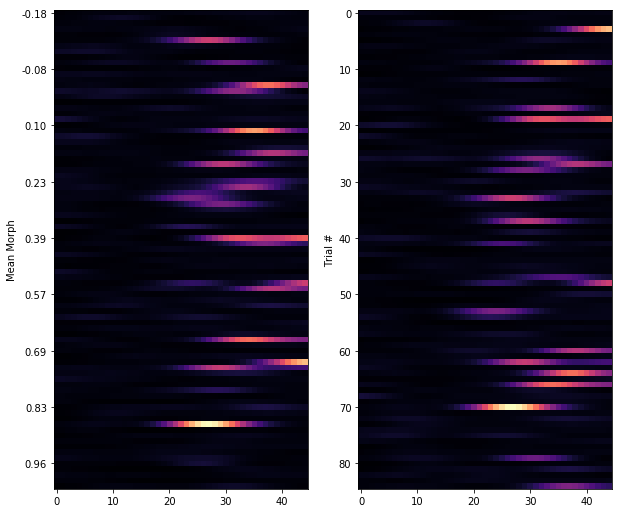

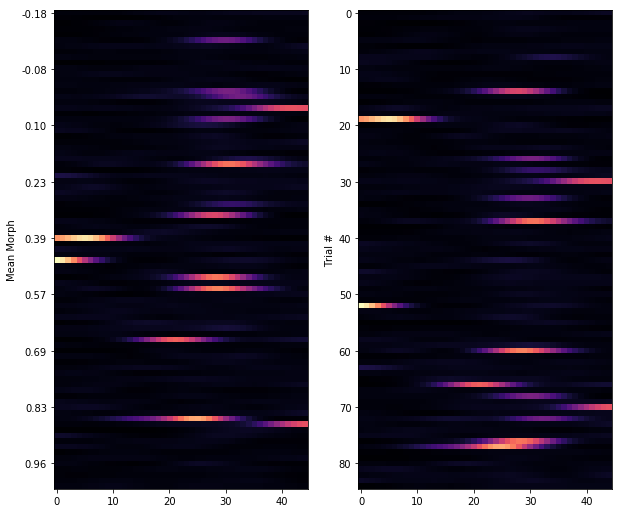

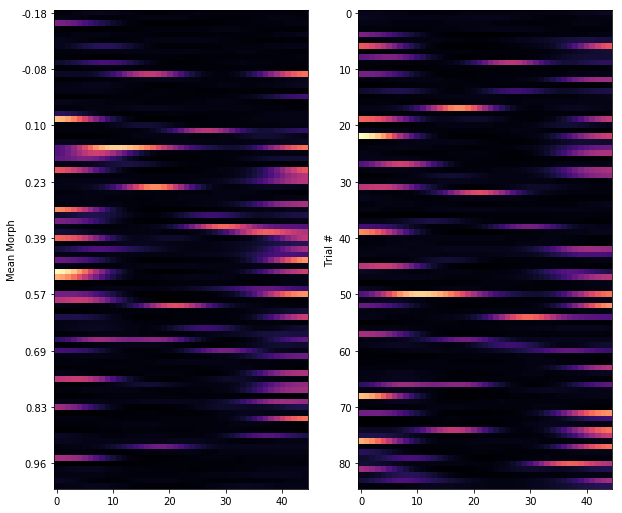

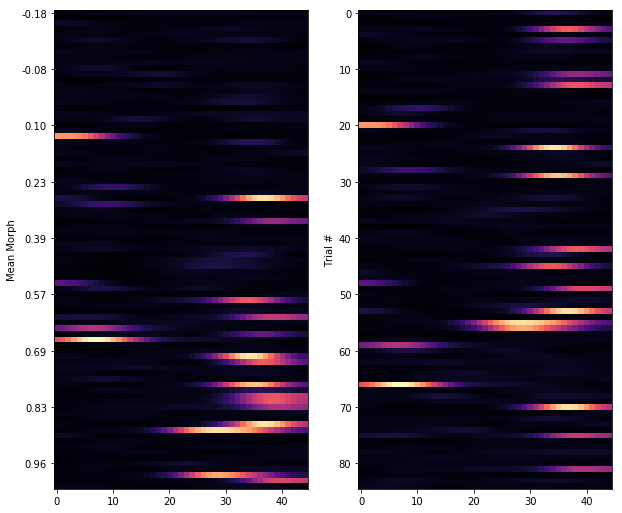

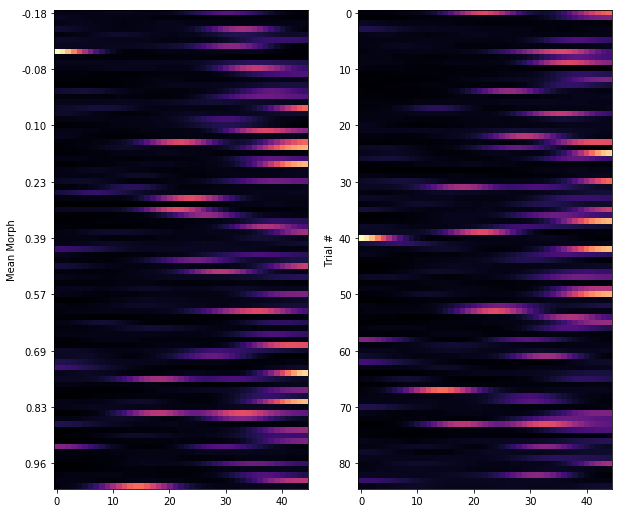

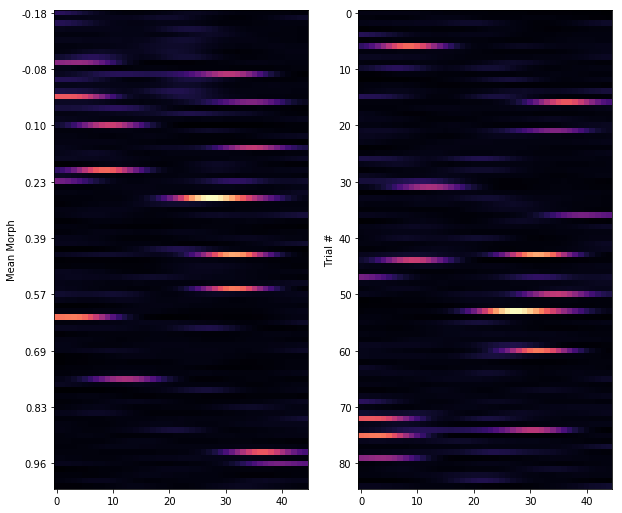

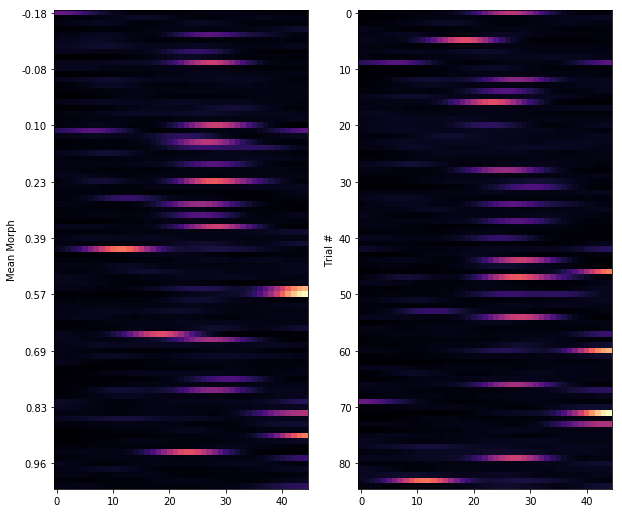

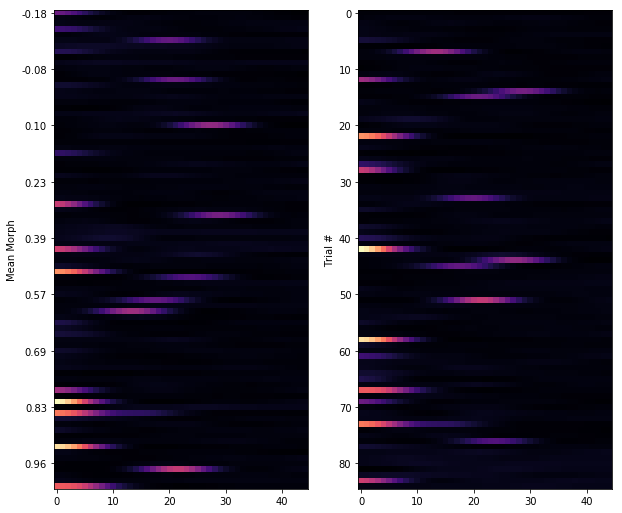

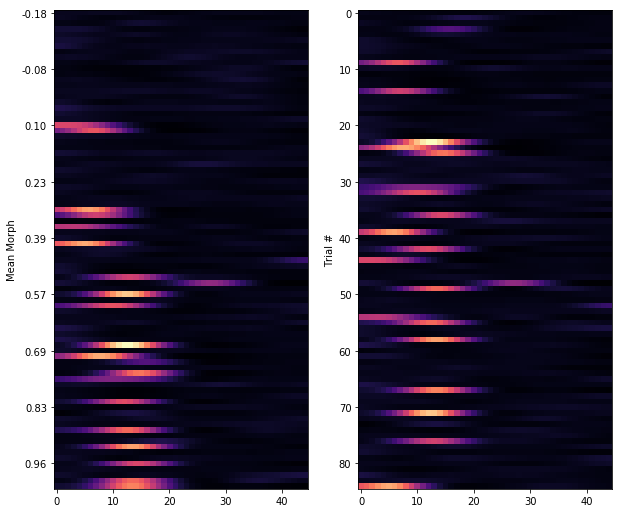

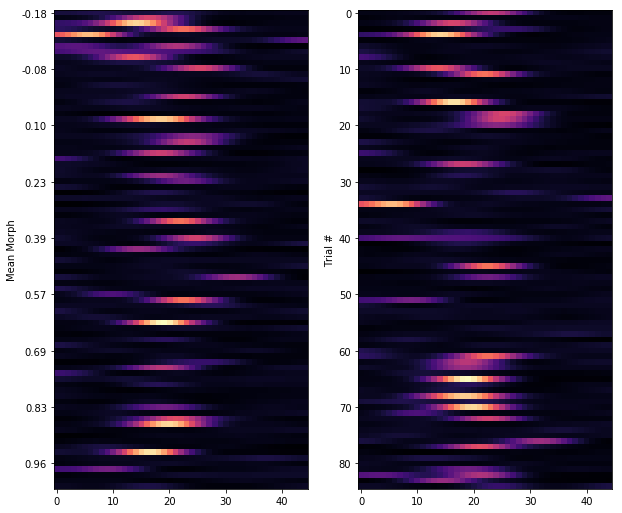

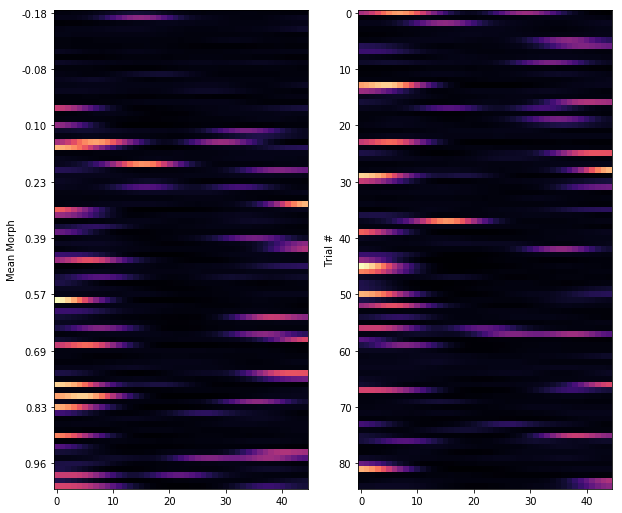

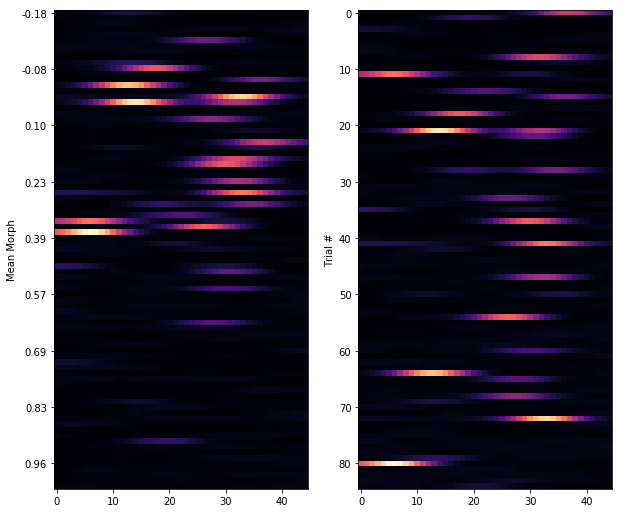

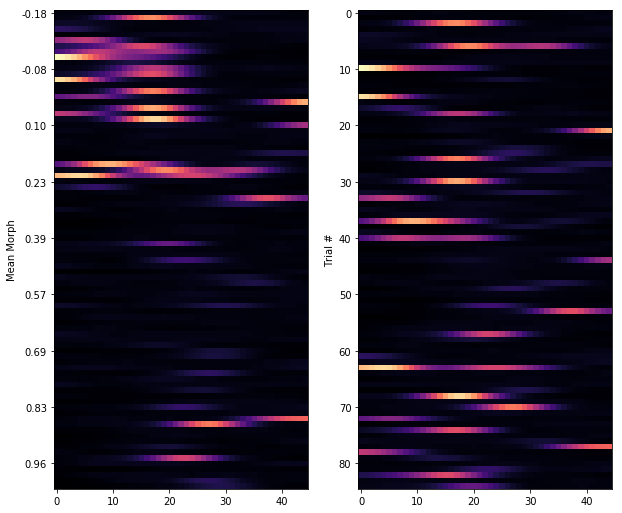

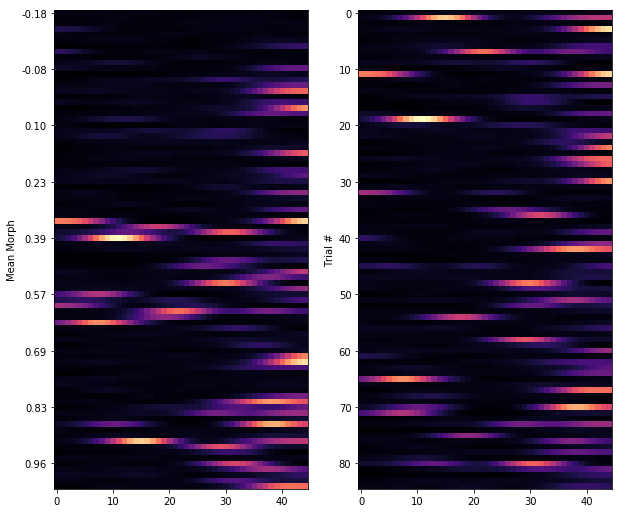

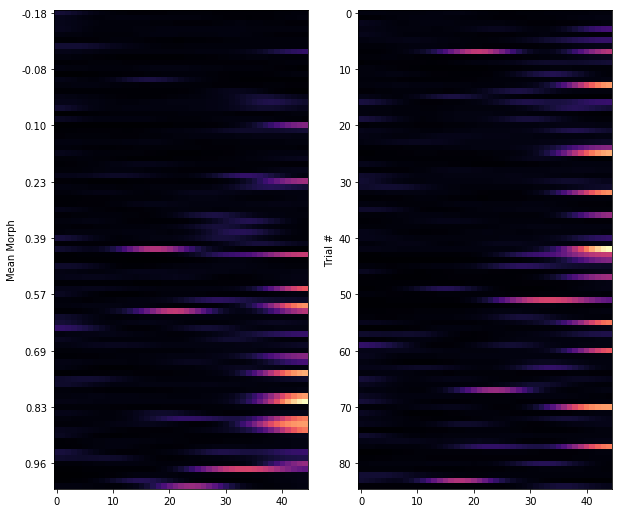

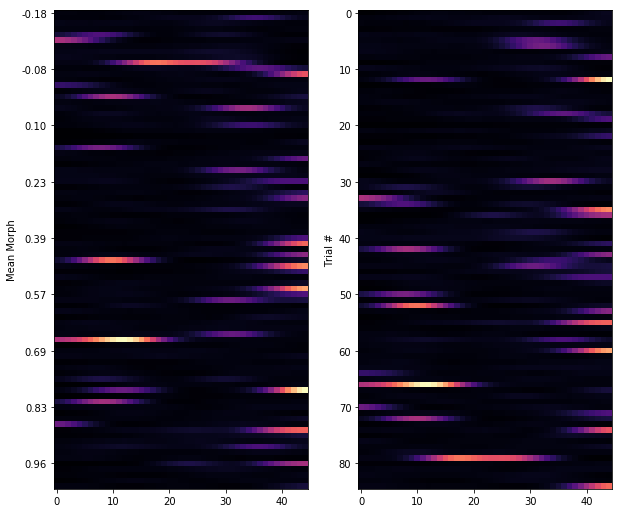

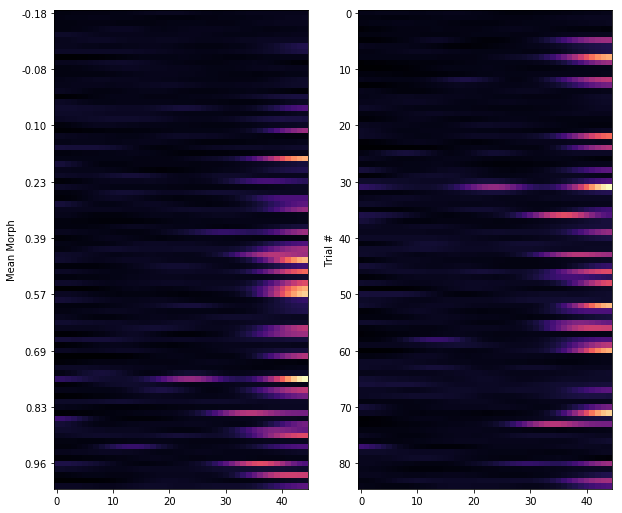

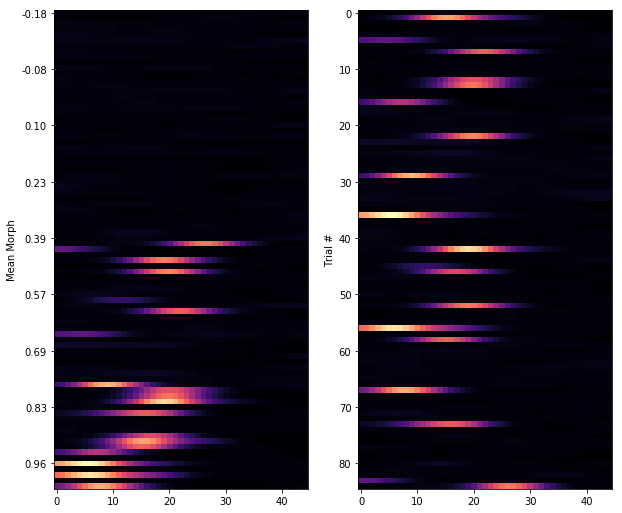

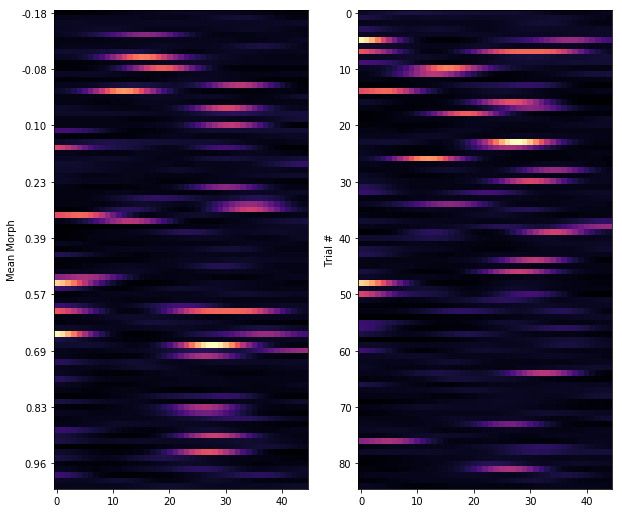

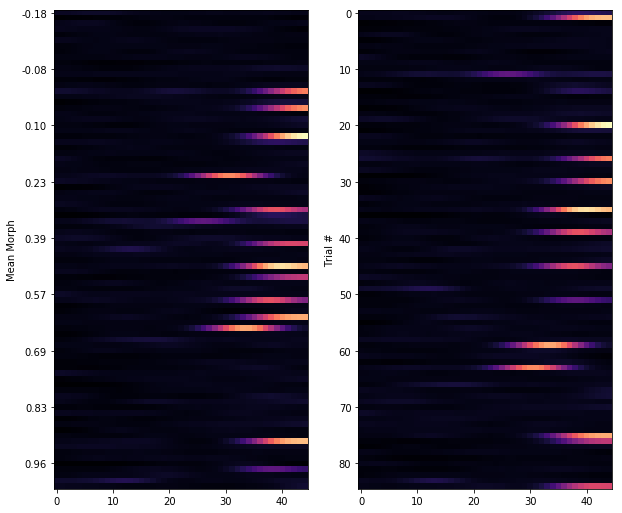

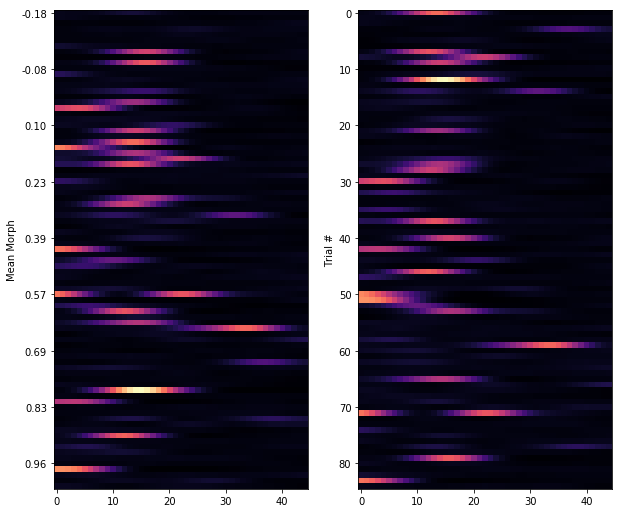

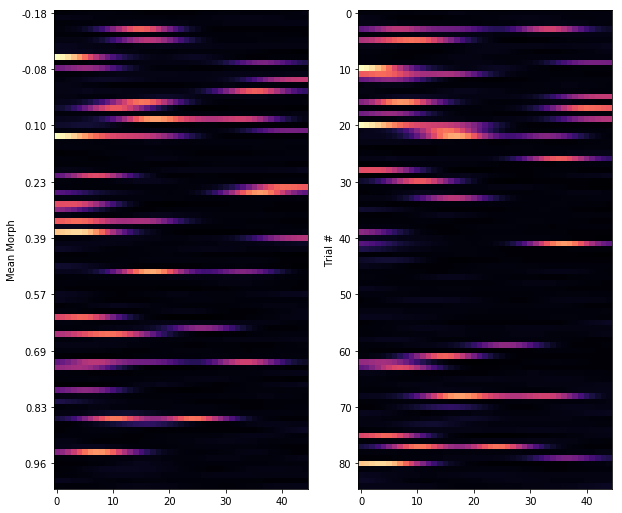

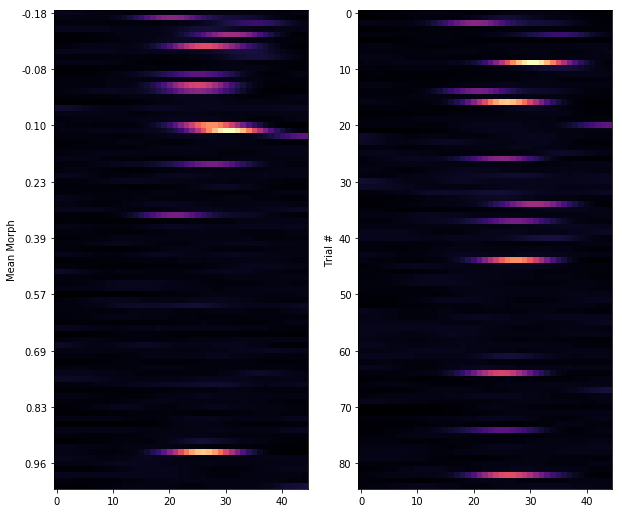

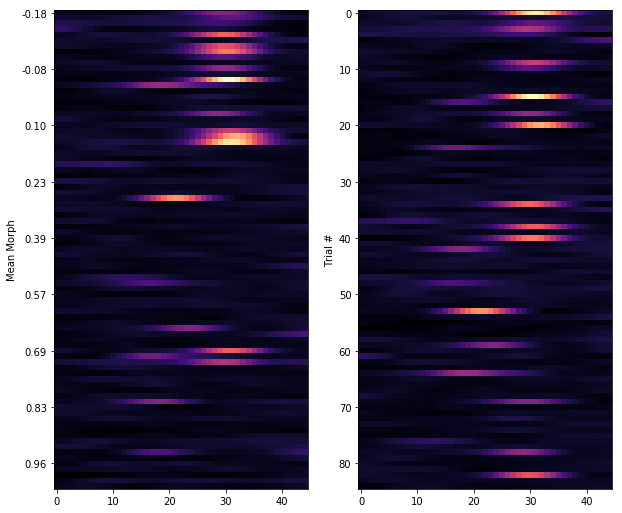

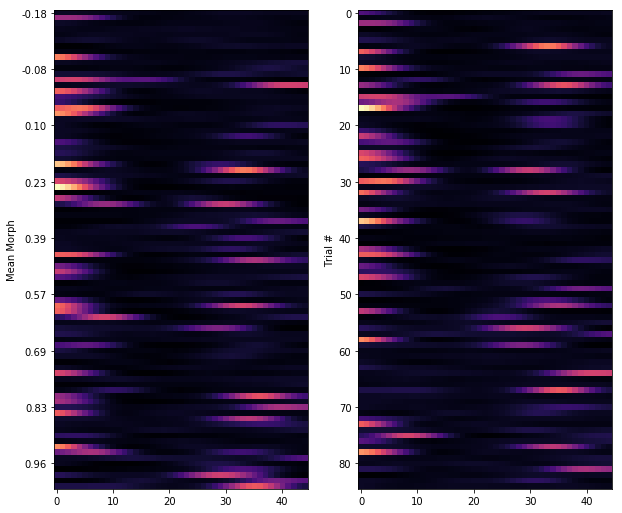

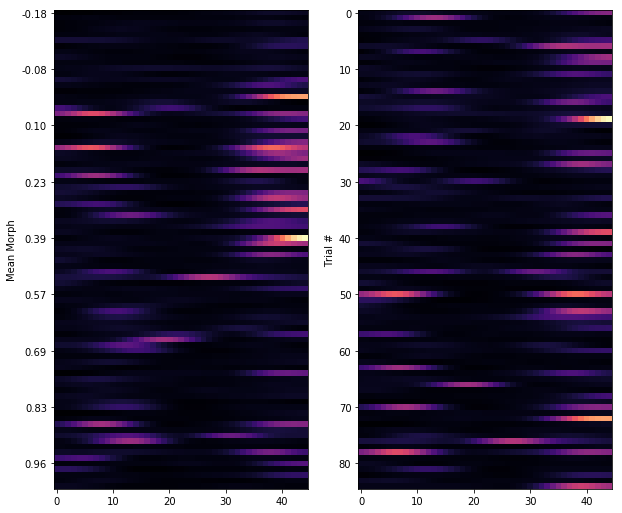

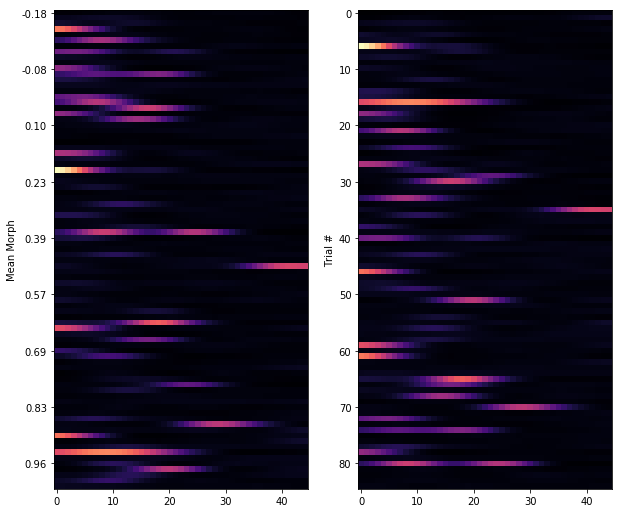

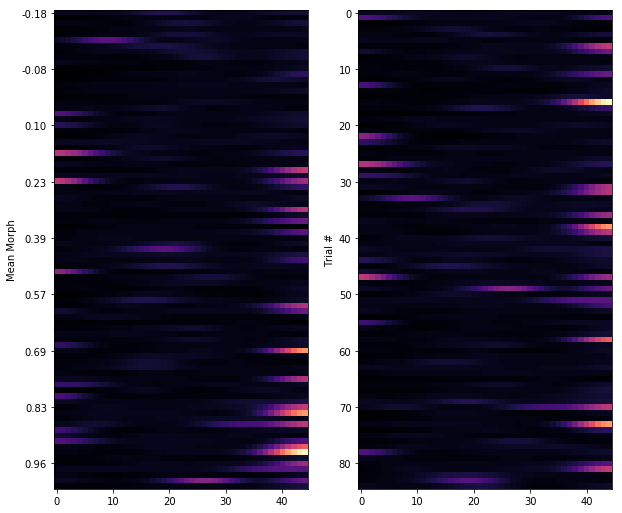

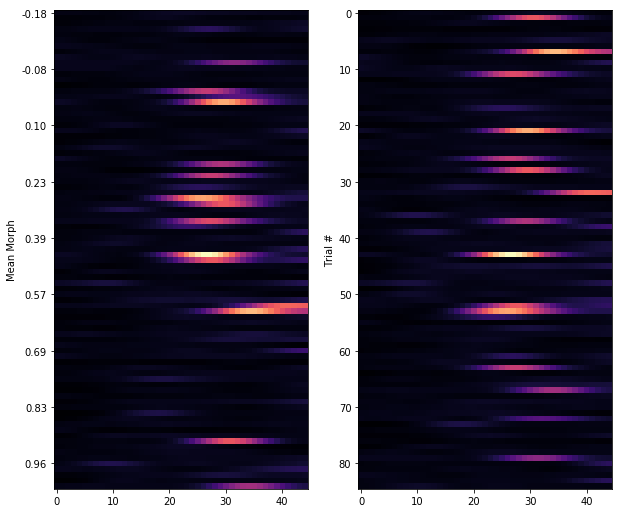

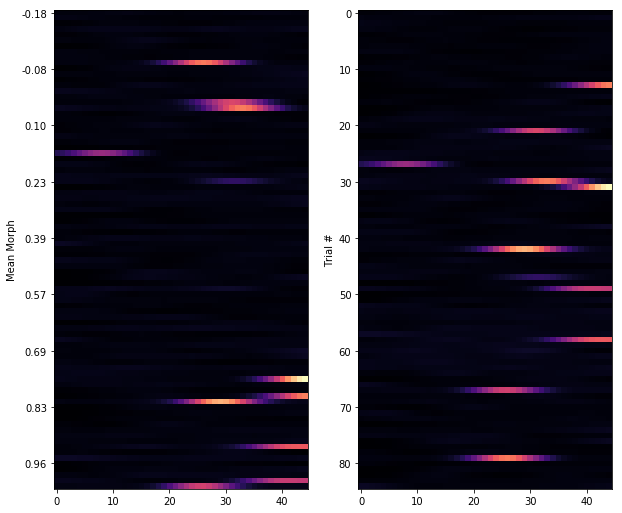

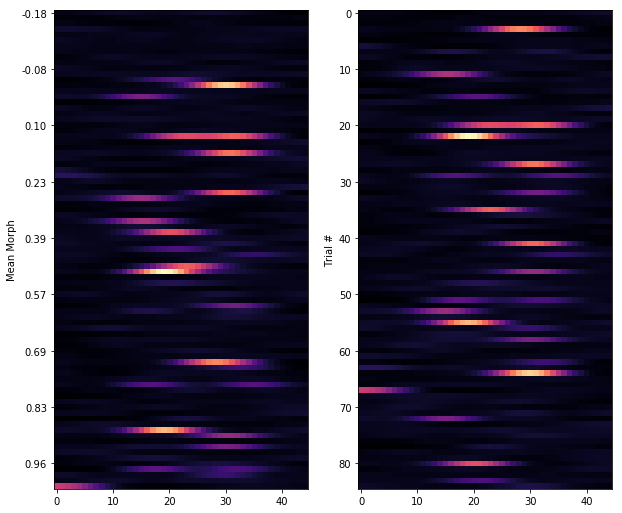

In [499]:
from scipy.ndimage import filters
effMorph_s = effMorph[msort]
for i,o in enumerate(order[:100].tolist()):
    f,ax = plt.subplots(1,2,figsize=(10,10))
    S_i = np.copy(S_trial_mat[:,:,o])
    nan_inds = np.isnan(S_i)
    S_i_nanless = np.copy(S_i)
    S_i_nanless[nan_inds]=0
    One = np.ones(S_i.shape)
    One[nan_inds]=.001
    S_i_nanless= filters.gaussian_filter(S_i_nanless,[0,3])
    One = filters.gaussian_filter(One,[0,3])
    S_i = S_i_nanless/One
    S_i[nan_inds]=np.nan
    S_i/=np.nanmean(S_i.ravel())
    ax[0].imshow(S_i[msort,:],cmap='magma') 
    ax[1].imshow(S_i,cmap='magma') 
    tick_inds = np.arange(0,S_i.shape[0],10)
    ax[0].set_yticks(tick_inds)
    tick_labels = ["%.2f" % effMorph_s[i] for i in tick_inds]
    ax[0].set_yticklabels(tick_labels)
    ax[0].set_ylabel('Mean Morph')
    ax[1].set_ylabel('Trial #')


In [408]:
from sklearn.decomposition import PCA

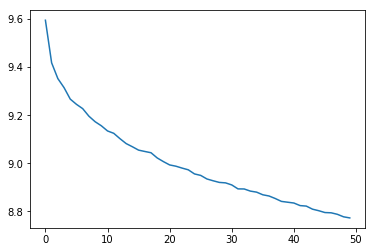

In [409]:
pca = PCA()
trialmask = (VRDat['pos']>0) & (VRDat['morph']==0)
S[np.isnan(S)]=0
S_sm = sp.ndimage.filters.gaussian_filter1d(S,5,axis=0)
X = pca.fit_transform(S_sm[trialmask,:])
f,ax = plt.subplots()
# ax.plot(np.cumsum(pca.explained_variance_ratio_)[:50])
ax.plot(np.log(pca.singular_values_)[:50])

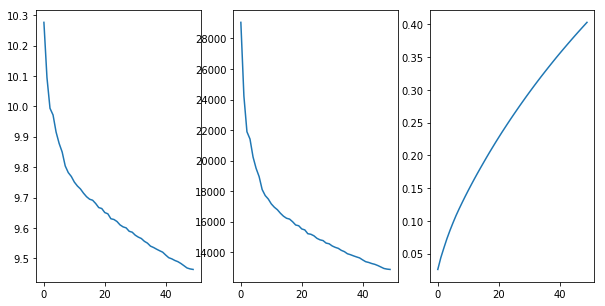

In [262]:
f,ax = plt.subplots(1,3,figsize=[10,5])
# ax.plot(np.cumsum(pca.explained_variance_ratio_)[:50])
ax[0].plot(np.log(pca.singular_values_)[:50])
ax[1].plot(pca.singular_values_[:50])
ax[2].plot(np.cumsum(pca.explained_variance_ratio_[:50]))

In [ ]:
# choosing 20 because it seems to get past the "kink" in singular value plots


In [501]:
S[np.isnan(S)]=0
S_sm = sp.ndimage.filters.gaussian_filter1d(S,5,axis=0)

In [502]:
S_sm_n = S_sm/(np.linalg.norm(S_sm,ord=2,axis=1)[:,np.newaxis]+.001)

In [503]:
print(S_sm_n.shape)

(37344, 1951)


In [504]:
S_cos = np.matmul(S_sm_n,S_sm_n.T)

In [505]:
print(S_cos.shape)

(37344, 37344)


In [506]:
lem = sk.manifold.SpectralEmbedding(affinity='precomputed',n_components=5)
X = lem.fit_transform(S_cos+.0001)


In [507]:
print(X.shape)

(37344, 5)


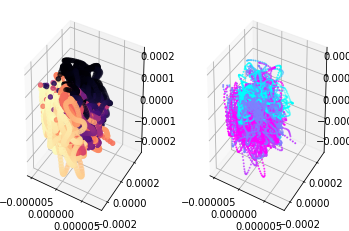

In [508]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
p_ax = fig.add_subplot(121, projection='3d')
mask = (VRDat['pos']._values>0) & (VRDat['morph']._values>=0)
p_ax.scatter(X[mask,0],X[mask,1],X[mask,2],c=VRDat['pos']._values[mask],cmap='magma')
m_ax = fig.add_subplot(122, projection='3d')
m_ax.scatter(X[mask,0],X[mask,1],X[mask,2],c=VRDat['morph']._values[mask],s=1,cmap='cool')
#m_ax.view_init(20,0)
